### A1. Research Question
 For this analysis, my research question is "What customer factors influence tenure?" 
 
### A2. Goals
 With this research question, my intention is to find what factors influence a customer to stay subscribed to the subscription service. By knowing what factors make customers loyal, we could actively work on expanding or supporting those factors in order to keep customer retention high. From the included information, churn is an important measurement for telecommunication companies. It stated that it cost as much as ten times more to create a new customer than it does to retain a current customer.  
 
### B1. Summary of Assumptions
 In order to use multiple linear regression, we must make the following assumptions.
 _Linear Relationship_ - First, there must be a linear relationship between the predictor (x) variables and the response (y) variable.
 _No Multicollinearity_ - Multicollinearity is a state that occurs when one or more of the independent variables  are strongly correlated with each other. This is a problem because the independent variables are supposed to be independent. You should be able to change them without changing the rest of the model in whole. However, if they are correlated with other variables, when you changed one of the independent variables, the correlated variable would change as well.
 _Homoscedasticity_ - The residuals of the model (the variance along the y-axis from the line of best fit) must be constant. If there is a large variance in the residuals this can make the model heteroscedastic, which can make the regression analysis invalid. 
 _Multivariate Normality_ - The residuals of the model are normally distributed. 
 

### B2. Tool Benefits 
 For this project, I am using Python. Python is excellent for data analysis and several packages have been built specifically for this purpose. I am choosing to use Python for all of my products because I don't know any programming languages, so I'm starting at the beginning. After doing some job searches online, I found Python to be a desired skill. It has also been fun to learn, and easy to understand. 
 For this analysis, I will be using the following packages:
 * Pandas - this library was created to help work with databases similar to a spreadsheet or list.
 * NumPy - this library is used for scientific computing and array operations.
 * Seaborn and MatPlotLib are both used for visualizations of data.
 * SciPy - statsmodels is a part of SciPy and this is what is used for the multiple regression model and for checking multicollinearity
 * Sklearn - this library is being used to scale the data to improve model performance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 

C:\Users\Crystal\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### B3. Appropriate Technique 

Multiple linear regresssion is helpful in answering my research question because it uses more than one explanatory variable to predict the response. For this research question, I am examining what customer factors have a relationship with the customer's tenure with the company. Customer Tenure is a continuous variable, and the other variables are a mix of categorical and continuous. 


### C1: Data Cleaning
For this particular research question, I used the churn dataset provided by WGU. In order to use this dataset, I needed to clean it up a little using some of the same types of fixes I used in d206. After importing the dataset, I looked for missing values within the dataset, and found some within the Internet Service column. After investigating further, I found that the values were not actually missing. Within this column, there were three available answers: DSL, Fiber Optic, and None. The None value was showing up as a null when I ran my check, so I converted it to a string that said "None" instead so it would not show up as missing any longer. 
After fixing the missing values, I cleaned up the zip codes and standardized them according to US time zones. Once I had completed cleaning the data, I started prepping for multiple regression analysis. Because multiple regression analysis requires the use of numerical values rather than strings, I converted the data to numbers. For any True/False values I changed them to 1/0. For categorical variables it depends on whether or not they are ordinal. If they are ordinal, the values can be converted to numbers that correspond to their order. For variables that are nominal without an order, I generated dummy columns that represent that data in binary numeric form using a process called one hot encoding. 

In [2]:
#C1. Data Cleaning

#Import dataframe and prep for data analysis
#import churn_clean pdf as df
import pandas as pd
df = pd.read_csv(r"C:\Users\Crystal\OneDrive\Desktop\d208\churn_clean.csv")

#Look for nulls in dataset
nan_rows = df.isna().any()
print(nan_rows)
df.info()

#Check value counts for InternetService column which shows missing values
df['InternetService'].value_counts()

CaseOrder               False
Customer_id             False
Interaction             False
UID                     False
City                    False
State                   False
County                  False
Zip                     False
Lat                     False
Lng                     False
Population              False
Area                    False
TimeZone                False
Job                     False
Children                False
Age                     False
Income                  False
Marital                 False
Gender                  False
Churn                   False
Outage_sec_perweek      False
Email                   False
Contacts                False
Yearly_equip_failure    False
Techie                  False
Contract                False
Port_modem              False
Tablet                  False
InternetService          True
Phone                   False
Multiple                False
OnlineSecurity          False
OnlineBackup            False
DeviceProt

InternetService
Fiber Optic    4408
DSL            3463
Name: count, dtype: int64

In [3]:
#Convert NA from InternetService column to string 'None'
df = df.fillna('None')

In [4]:
#Verify the missing values are gone
df.info()
df['InternetService'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

<Axes: >

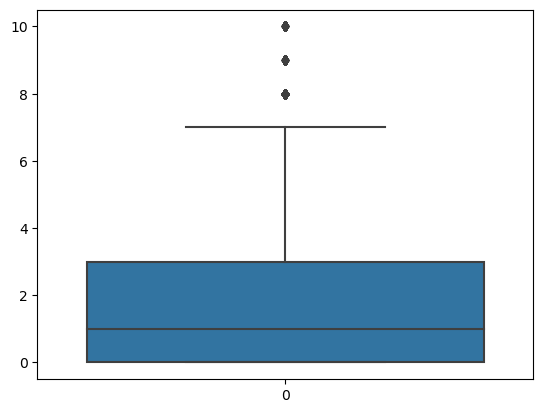

In [5]:
#Detect outliers in Children
sns.boxplot(df['Children'])

<Axes: >

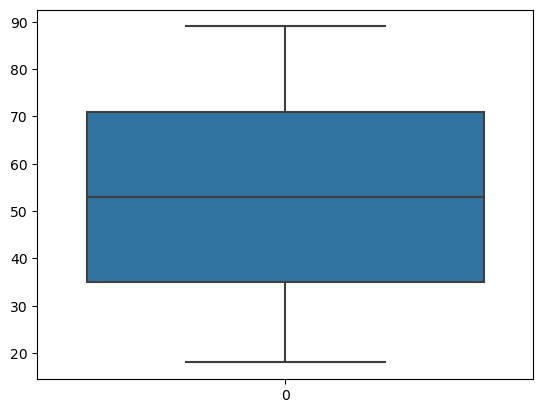

In [6]:
#Detect outliers in Age
sns.boxplot(df['Age'])

<Axes: >

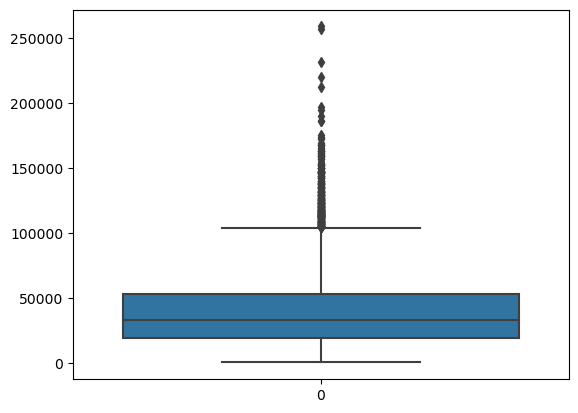

In [7]:
#Detect outliers in Income
sns.boxplot(df['Income'])

<Axes: >

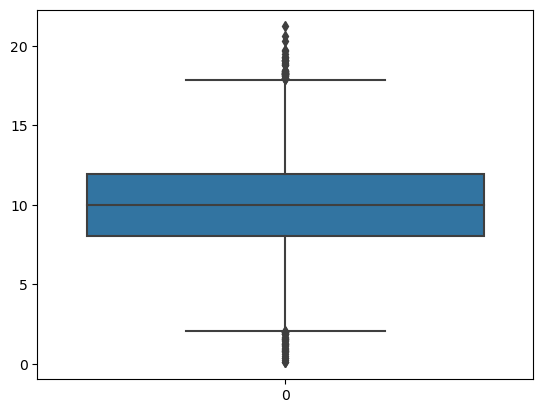

In [8]:
#Detect outliers in Outage_sec_perweek
sns.boxplot(df['Outage_sec_perweek'])

<Axes: >

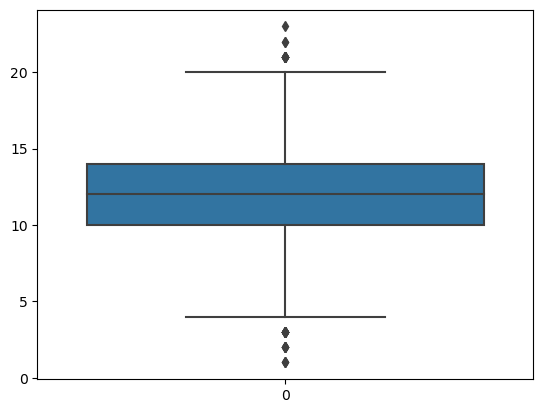

In [9]:
#Detect outliers in Email
sns.boxplot(df['Email'])

<Axes: >

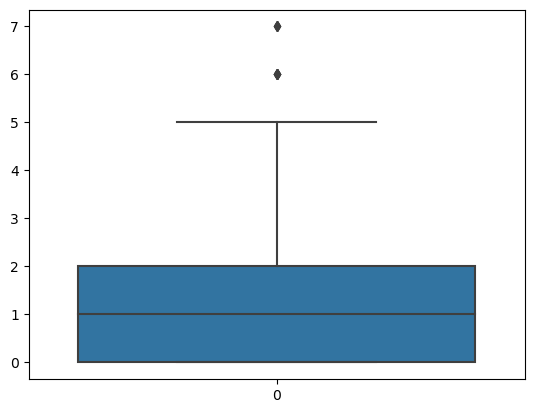

In [10]:
#Detect outliers in Contacts
sns.boxplot(df['Contacts'])

<Axes: >

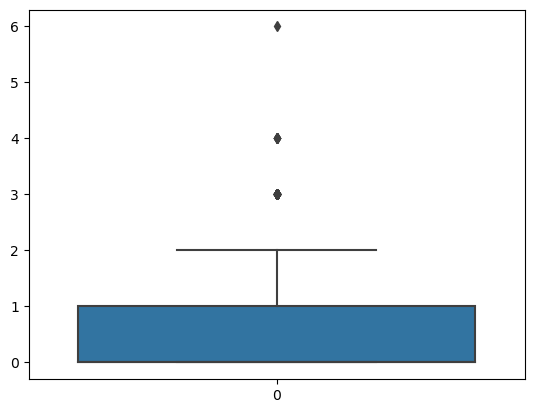

In [11]:
#Detect outliers in Yearly_equip_failure
sns.boxplot(df['Yearly_equip_failure'])

<Axes: >

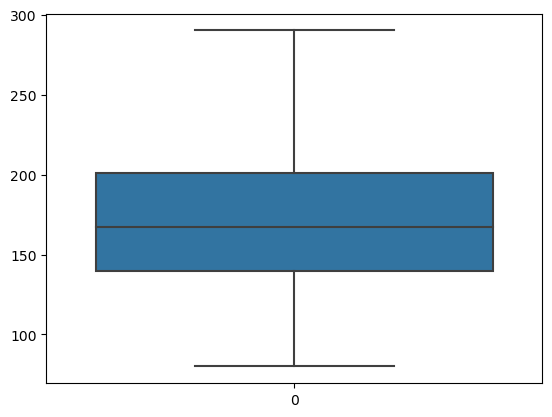

In [12]:
#Detect outliers in MonthlyCharge
sns.boxplot(df['MonthlyCharge'])

<Axes: >

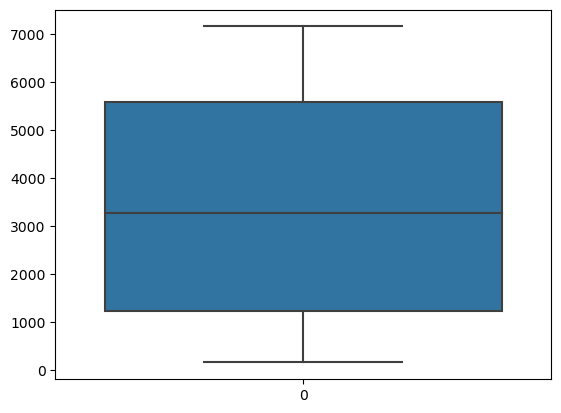

In [13]:
#Detect outliers in Bandwidth_GB_Year
sns.boxplot(df['Bandwidth_GB_Year'])

Outliers are extreme values at either end of a dataset. After looking at the boxplots for the numerical variables within this dataset, I have found that they are all reasonable, and representative of actual data within the dataset. I have elected not to remove any of the entries. 

### C2: Summary Statistics 

For this analysis, I am using the tenure variable as the dependent (y) and the following variables as my explanatory variables (x):

* Children - This is the number of children in the customer's household
* Age - This is the age of the customer as reported in sign-up information
* Income - Annual income of invoiced customer as reported at time of sign-up
* Marital - Marital status of customer as reported in sign-up information
* Gender - Customer self-identification as male, female, or nonbinary
* Outage_sec_perweek - Average number of seconds per week of outages reported in customer's neighborhood
* Email - Number of emails sent to customer within last year
* Contacts - Number of times customer contacted tech support 
* Yearly_equip_failure - Number of times customer's equipment failed in past year
* Techie - Whether customer considers themselves technically inclined as reported at time of sign-up
* Contract - Contract term of service
* Port_modem - Whether customer has portable modem
* Tablet - Whether customer has a tablet
* InternetService - Customer's internet service provider
* Phone - Whether customer has phone service
* Multiple - Whether customer has multiple phone lines
* OnlineSecurity - Whether customer has online security add-on
* OnlineBackup - Whether customer has online backup add-on
* DeviceProtection - Whether customer has device protection add-on
* TechSupport - Whether customer has a tech support add-on
* StreamingTV - Whether customer has streaming TV
* StreamingMovies - Whether customer has streaming movies
* PaperlessBilling - Whether customers has paperless billing
* PaymentMethod - Customer's payment method
* MonthlyCharge - Average amount charged to customer monthly
* Bandwidth_GB_Year - Average amount of data used in GB per year by customer 

#### Children
- For this variable, the mean doesn't really provide any useful information. Knowing the average number of children for the customers overall doesn't provide any real insights, so I included a value count as well. 

In [14]:
df['Children'].describe()

count    10000.0000
mean         2.0877
std          2.1472
min          0.0000
25%          0.0000
50%          1.0000
75%          3.0000
max         10.0000
Name: Children, dtype: float64

In [15]:
df['Children'].value_counts().sort_index()

Children
0     2570
1     2472
2     1495
3     1472
4     1006
5      212
6      187
7      185
8      210
9       92
10      99
Name: count, dtype: int64

#### Age
- Age is an interesting variable when it comes to this research question. While it is something that shouldn't be ignored in the research, it won't be able to tell us much on its own. While age may play a part in how likely a person is to stay loyal to a company or not, there are so many other factors at play. For example, a 53 year old single man has different cable or entertainment needs than a 53 year old father with children would have. I have included it in the analysis, but in the real world I would expect the age would be more helpful when paired with marital or household information. 

In [16]:
df['Age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

#### Income
- This category has a wide variance of entries, so I looked into the 20 smallest and 20 highest figures and found that there were multiple figures in each range. Because there were multipe low figures, and multiple high figures, I didn't feel that they should be considered excluded from the data. 

In [17]:
df.Income.nsmallest(n=20)

4502     348.67
272      368.50
2051     630.24
6732     643.20
6190     644.32
1896     740.66
2525     901.21
4169     938.81
5461     945.47
4733     951.96
5714     954.43
9313    1050.46
4627    1055.12
3649    1062.32
3534    1109.71
4419    1143.18
2183    1179.53
1418    1193.19
4387    1193.66
4902    1263.57
Name: Income, dtype: float64

In [18]:
df.Income.nlargest(n=20)

4249    258900.70
9180    256998.40
6649    231252.00
5599    220383.00
5801    212255.30
6594    196746.00
6837    194550.70
3985    189938.40
8830    186156.60
972     186035.04
2762    175137.30
9249    173978.00
656     172884.11
3782    172372.20
685     169580.73
688     168097.10
6130    167846.00
3132    167566.60
3953    166553.10
1725    165151.02
Name: Income, dtype: float64

In [19]:
df['Income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

#### Marital
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [20]:
df['Marital'].value_counts()

Marital
Divorced         2092
Widowed          2027
Separated        2014
Never Married    1956
Married          1911
Name: count, dtype: int64

#### Gender 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function. .

In [21]:
df['Gender'].value_counts()

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

#### Outages in seconds per week

In [22]:
df['Outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

#### Email 

In [23]:
df['Email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: Email, dtype: float64

#### Contacts

In [24]:
df['Contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Contacts, dtype: float64

#### Yearly Equipment Failure

In [25]:
df['Yearly_equip_failure'].describe()

count    10000.000000
mean         0.398000
std          0.635953
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          6.000000
Name: Yearly_equip_failure, dtype: float64

#### Techie 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [26]:
df['Techie'].value_counts()

Techie
No     8321
Yes    1679
Name: count, dtype: int64

#### Contract
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [27]:
df['Contract'].value_counts()

Contract
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

#### Port modem 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [28]:
df['Port_modem'].value_counts()

Port_modem
No     5166
Yes    4834
Name: count, dtype: int64

#### Tablet
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [29]:
df['Tablet'].value_counts()

Tablet
No     7009
Yes    2991
Name: count, dtype: int64

#### Internet Service 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [30]:
df['InternetService'].value_counts()

InternetService
Fiber Optic    4408
DSL            3463
None           2129
Name: count, dtype: int64

#### Phone 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [31]:
df['Phone'].value_counts()

Phone
Yes    9067
No      933
Name: count, dtype: int64

#### Multiple 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [32]:
df['Multiple'].value_counts()

Multiple
No     5392
Yes    4608
Name: count, dtype: int64

#### Online Security 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [33]:
df['OnlineSecurity'].value_counts()

OnlineSecurity
No     6424
Yes    3576
Name: count, dtype: int64

#### Online Backup 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [34]:
df['OnlineBackup'].value_counts()

OnlineBackup
No     5494
Yes    4506
Name: count, dtype: int64

#### Device Protection 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [35]:
df['DeviceProtection'].value_counts()

DeviceProtection
No     5614
Yes    4386
Name: count, dtype: int64

#### Tech Support 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [36]:
df['TechSupport'].value_counts()

TechSupport
No     6250
Yes    3750
Name: count, dtype: int64

#### Streaming TV 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [37]:
df['StreamingTV'].value_counts()

StreamingTV
No     5071
Yes    4929
Name: count, dtype: int64

#### Streaming Movies 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [38]:
df['StreamingMovies'].value_counts()

StreamingMovies
No     5110
Yes    4890
Name: count, dtype: int64

#### Paperless Billing 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [39]:
df['PaperlessBilling'].value_counts()

PaperlessBilling
Yes    5882
No     4118
Name: count, dtype: int64

#### Payment Method 
- Because this is a categorical variable rather than a continuous variable, I have used the value counts instead of the describe function.

In [40]:
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

#### Tenure 

In [41]:
df['Tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

#### Monthly Charge

In [42]:
df['MonthlyCharge'].describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

#### Bandwidth in GB per Year

In [43]:
df['Bandwidth_GB_Year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

### C3: Visualizations
For the visualizations, I am beginning with the target variable tenure. This variable is a measure of the amount of time a customer has been with the provider in months. 

Text(0, 0.5, 'Number of Customers')

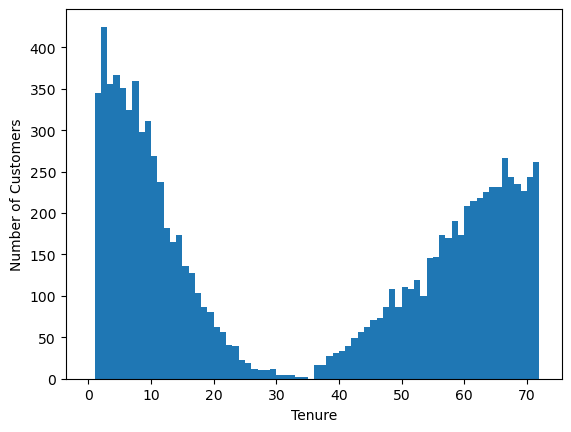

In [44]:
bins = np.arange(0, 73, 1)
plt.hist(data=df, x='Tenure', bins=bins)
plt.xlabel('Tenure')
plt.ylabel('Number of Customers')

This is an interesting outcome. I would have expected to see a normal distribution amongst the customers. Instead it looks like there is a large number of new customers who have been around less than two years, and a medium amount of customers who have been loyal for around 5 years or more. The middle section is much lower. More research would be recommended, but it may be worth looking into why customers are leaving after a couple of years. Are there rate hikes that are driving them away? 


For the independent variables, I will be presenting a univariate visualization as well as a bivariate visualization comparing them to the tenure variable. 

Text(0, 0.5, 'Tenure in Months')

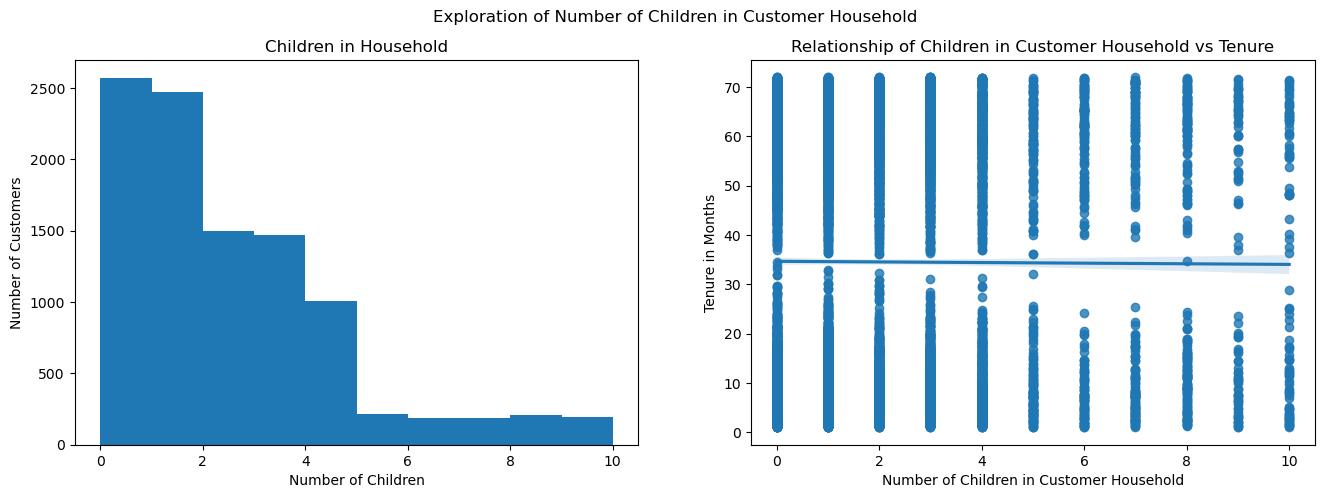

In [45]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Number of Children in Customer Household')

#LEFT PLOT: Univariate exploration of Children
plt.subplot(1,2,1)
plt.title('Children in Household')
bins = np.arange(0, df.Children.max() +1,1)
plt.hist(data=df, x='Children', bins=bins)
plt.xlabel('Number of Children')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Children vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Children in Customer Household vs Tenure')
sns.regplot(data=df, x='Children', y='Tenure')
plt.xlabel('Number of Children in Customer Household')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

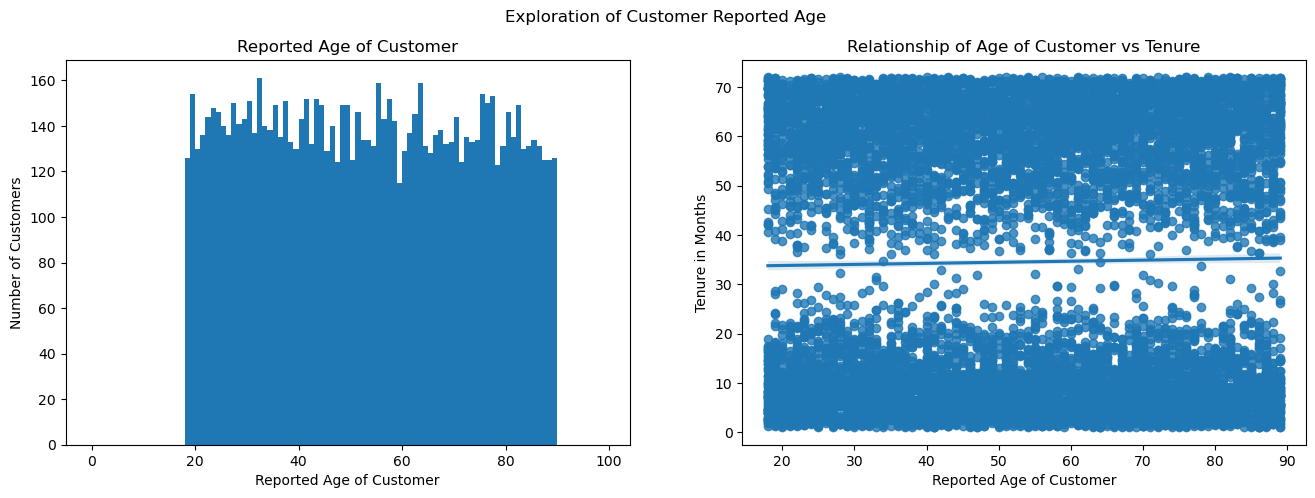

In [46]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Reported Age')

#LEFT PLOT: Univariate exploration of Age
plt.subplot(1,2,1)
plt.title('Reported Age of Customer')
bins = np.arange(0, 100,1)
plt.hist(data=df, x='Age', bins=bins)
plt.xlabel('Reported Age of Customer')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Age vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Age of Customer vs Tenure')
sns.regplot(data=df, x='Age', y='Tenure')
plt.xlabel('Reported Age of Customer')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

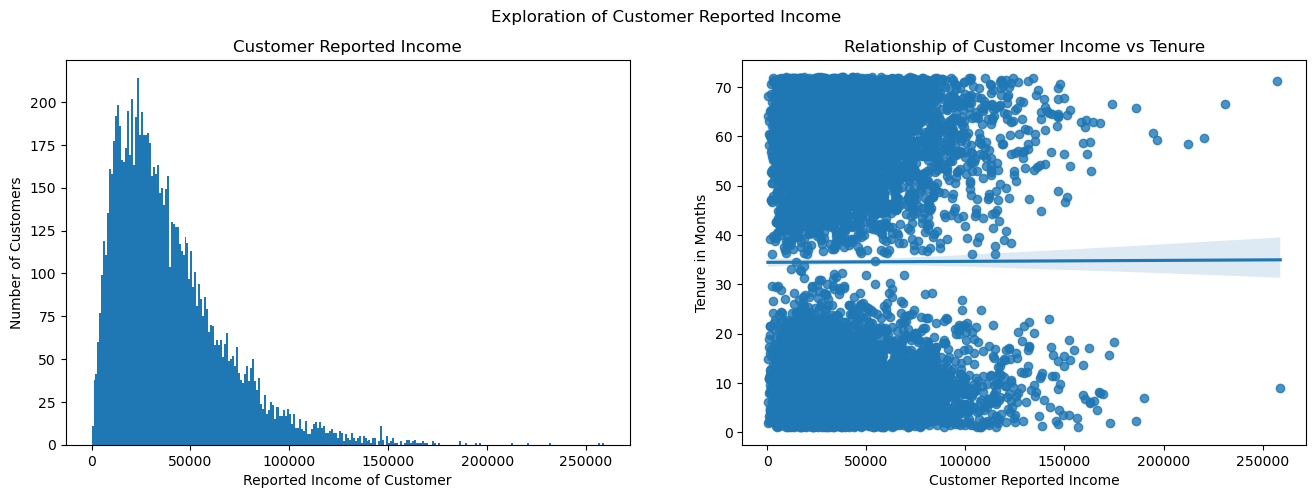

In [47]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Reported Income')

#LEFT PLOT: Univariate exploration of Children
plt.subplot(1,2,1)
plt.title('Customer Reported Income')
bins = np.arange(0, df.Income.max() +1000,1000)
plt.hist(data=df, x='Income', bins=bins)
plt.xlabel('Reported Income of Customer')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Children vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Income vs Tenure')
sns.regplot(data=df, x='Income', y='Tenure')
plt.xlabel('Customer Reported Income')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

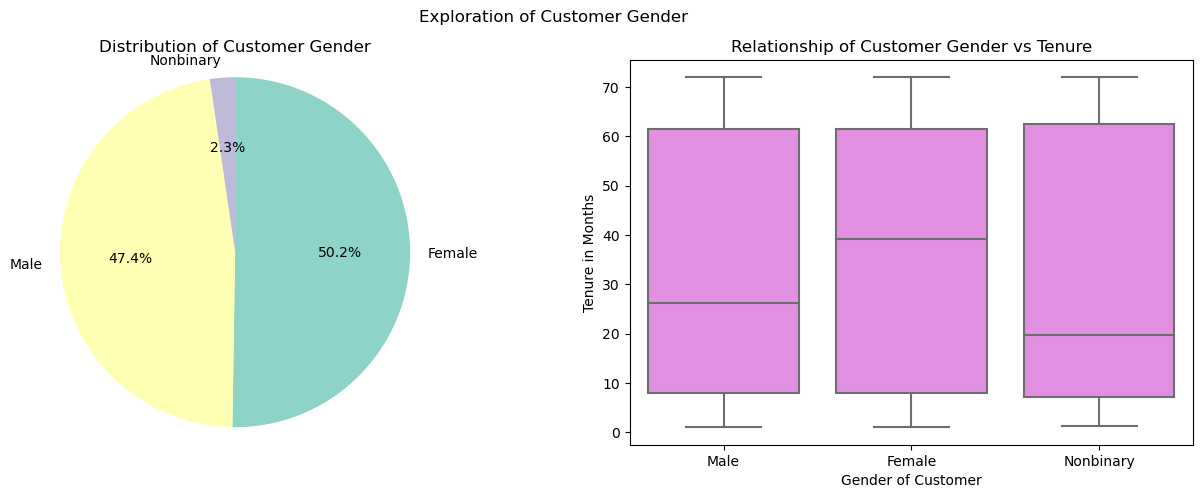

In [48]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Gender')

#LEFT PLOT: Univariate exploration of Gender
plt.subplot(1,2,1)
plt.title('Distribution of Customer Gender')
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'),counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Gender vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Gender vs Tenure')
sns.boxplot(data=df, x='Gender', y='Tenure', color='violet')
plt.xlabel('Gender of Customer')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

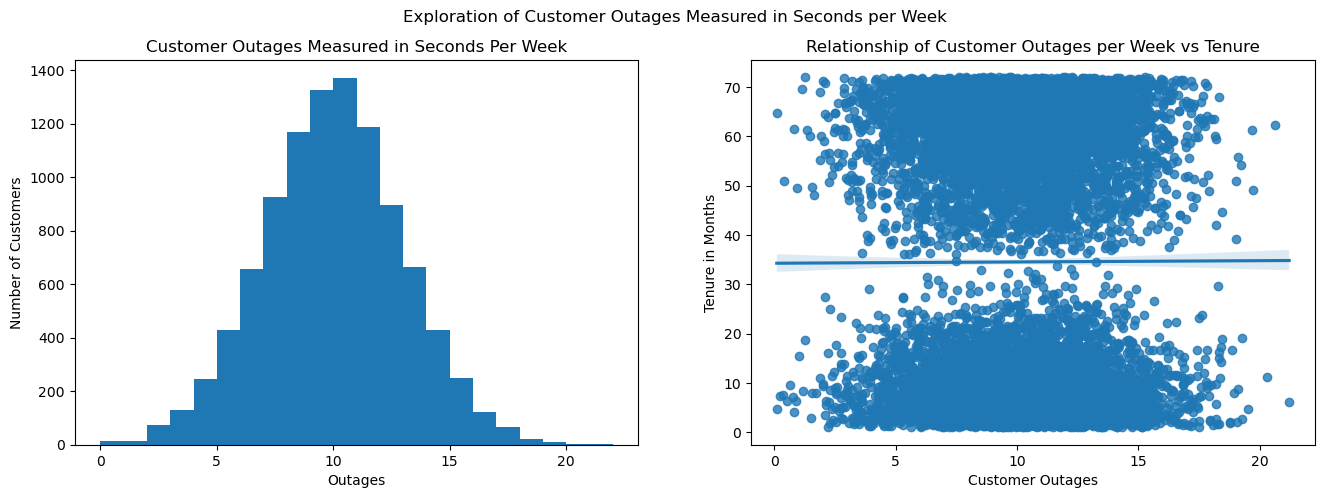

In [49]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Outages Measured in Seconds per Week')

#LEFT PLOT: Univariate exploration of Outage_sec_perweek
plt.subplot(1,2,1)
plt.title('Customer Outages Measured in Seconds Per Week')
bins=np.arange(0, df.Outage_sec_perweek.max()+1, 1)
plt.hist(data=df, x='Outage_sec_perweek', bins=bins)
plt.xlabel('Outages')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Outage_sec_perweek vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Outages per Week vs Tenure')
sns.regplot(data=df, x='Outage_sec_perweek', y='Tenure')
plt.xlabel('Customer Outages')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

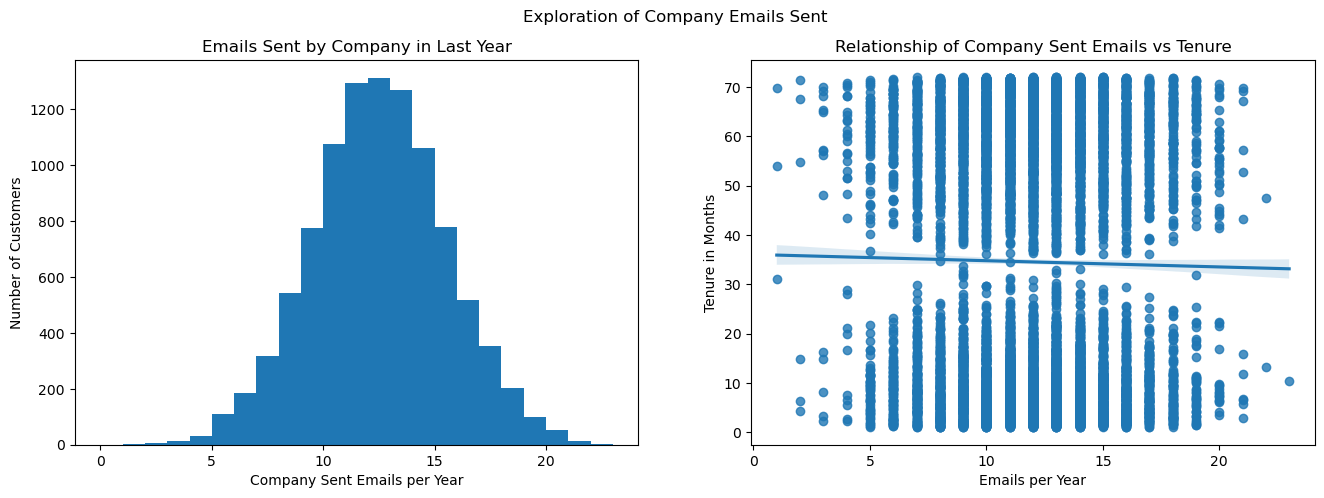

In [50]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Company Emails Sent')

#LEFT PLOT: Univariate exploration of Email
plt.subplot(1,2,1)
plt.title('Emails Sent by Company in Last Year')
bins = np.arange(0, df.Email.max() +1,1)
plt.hist(data=df, x='Email', bins=bins)
plt.xlabel('Company Sent Emails per Year')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Email vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Company Sent Emails vs Tenure')
sns.regplot(data=df, x='Email', y='Tenure')
plt.xlabel('Emails per Year')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

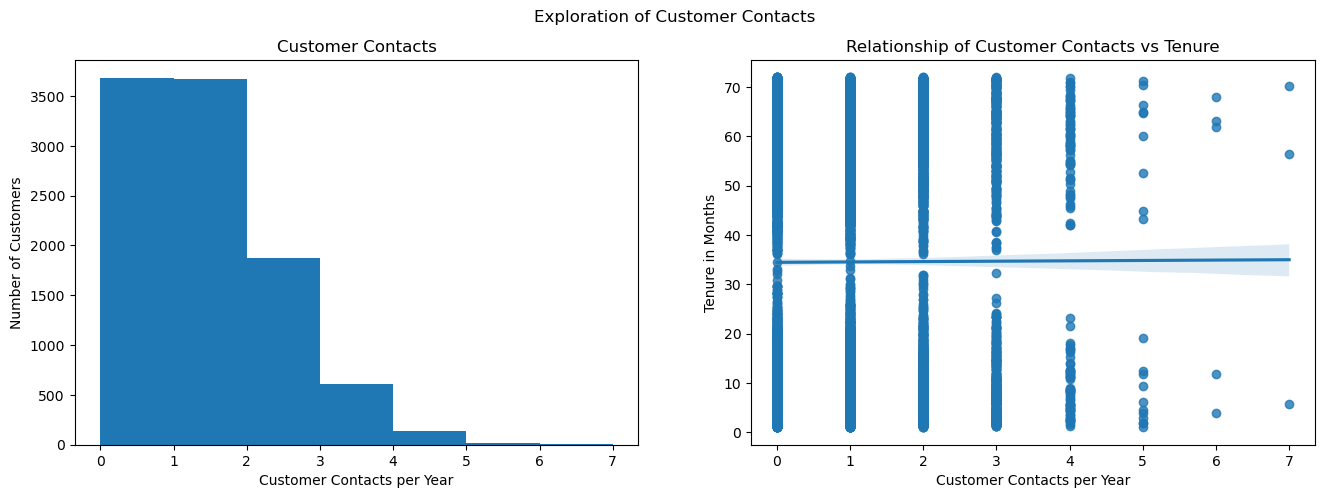

In [51]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Contacts')

#LEFT PLOT: Univariate exploration of Contacts
plt.subplot(1,2,1)
plt.title('Customer Contacts')
bins = np.arange(0, df.Contacts.max() +1,1)
plt.hist(data=df, x='Contacts', bins=bins)
plt.xlabel('Customer Contacts per Year')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Contacts vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Contacts vs Tenure')
sns.regplot(data=df, x='Contacts', y='Tenure')
plt.xlabel('Customer Contacts per Year')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

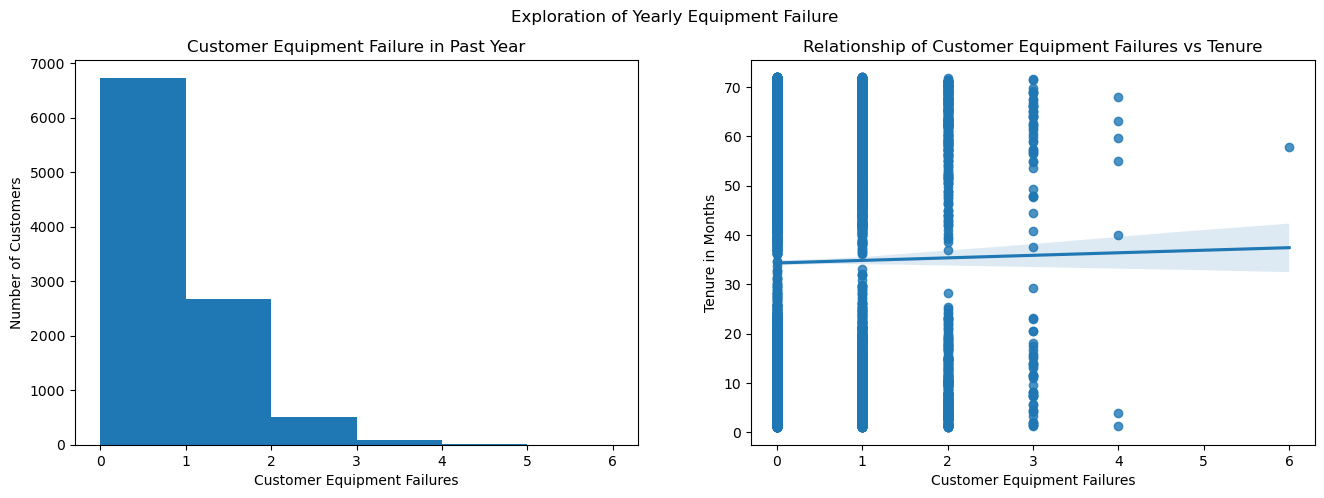

In [52]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Yearly Equipment Failure')

#LEFT PLOT: Univariate exploration of Yearly_equip_failure
plt.subplot(1,2,1)
plt.title('Customer Equipment Failure in Past Year')
bins = np.arange(0, df.Yearly_equip_failure.max() +1,1)
plt.hist(data=df, x='Yearly_equip_failure', bins=bins)
plt.xlabel('Customer Equipment Failures')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Yearly_equip_failure vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Equipment Failures vs Tenure')
sns.regplot(data=df, x='Yearly_equip_failure', y='Tenure')
plt.xlabel('Customer Equipment Failures')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

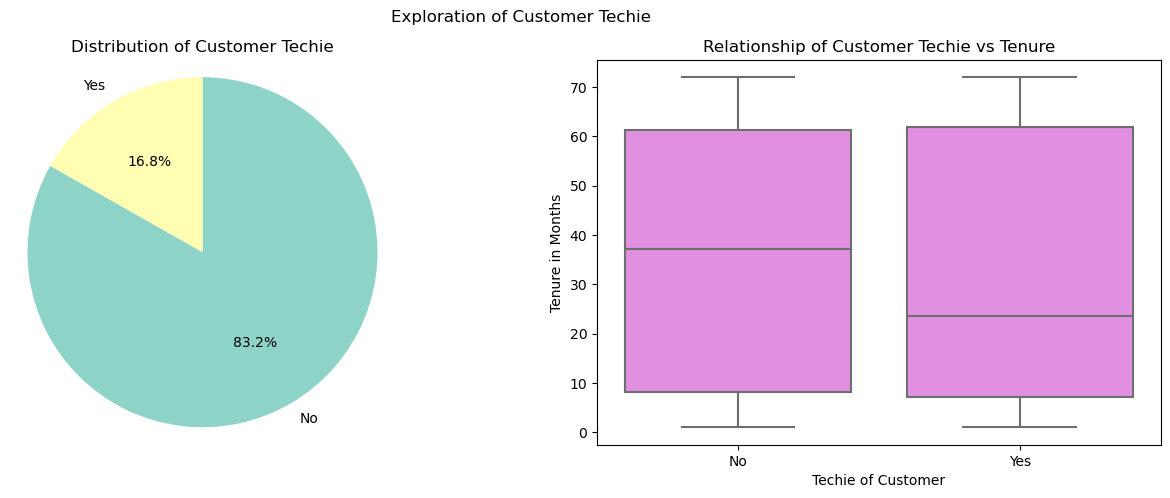

In [53]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Techie')

#LEFT PLOT: Univariate exploration of Techie
plt.subplot(1,2,1)
plt.title('Distribution of Customer Techie')
techie_counts = df['Techie'].value_counts()
plt.pie(techie_counts, labels=techie_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Techie vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Techie vs Tenure')
sns.boxplot(data=df, x='Techie', y='Tenure', color='violet')
plt.xlabel('Techie of Customer')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

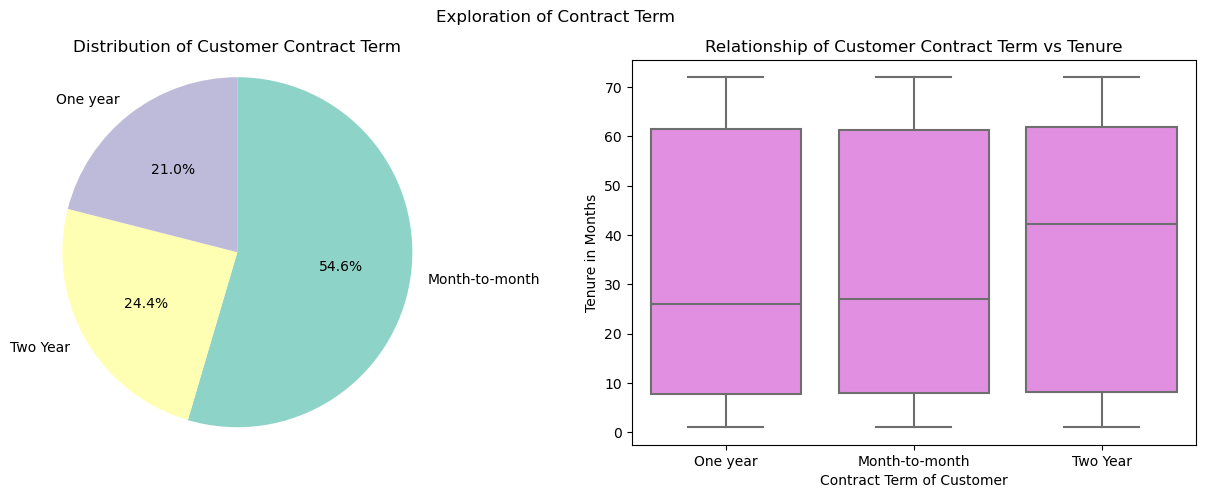

In [54]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Contract Term')

#LEFT PLOT: Univariate exploration of Contract
plt.subplot(1,2,1)
plt.title('Distribution of Customer Contract Term')
contract_counts = df['Contract'].value_counts()
plt.pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Contract vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Contract Term vs Tenure')
sns.boxplot(data=df, x='Contract', y='Tenure', color='violet')
plt.xlabel('Contract Term of Customer')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

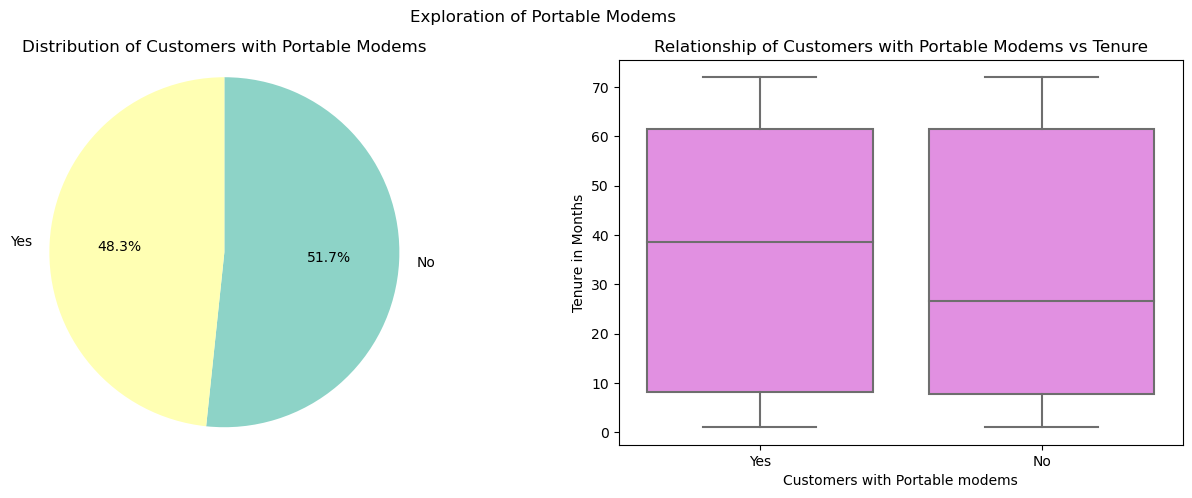

In [55]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Portable Modems')

#LEFT PLOT: Univariate exploration of Port_modem
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Portable Modems')
modem_counts = df['Port_modem'].value_counts()
plt.pie(modem_counts, labels=modem_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'),counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Port_modem vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Portable Modems vs Tenure')
sns.boxplot(data=df, x='Port_modem', y='Tenure', color='violet')
plt.xlabel('Customers with Portable modems')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

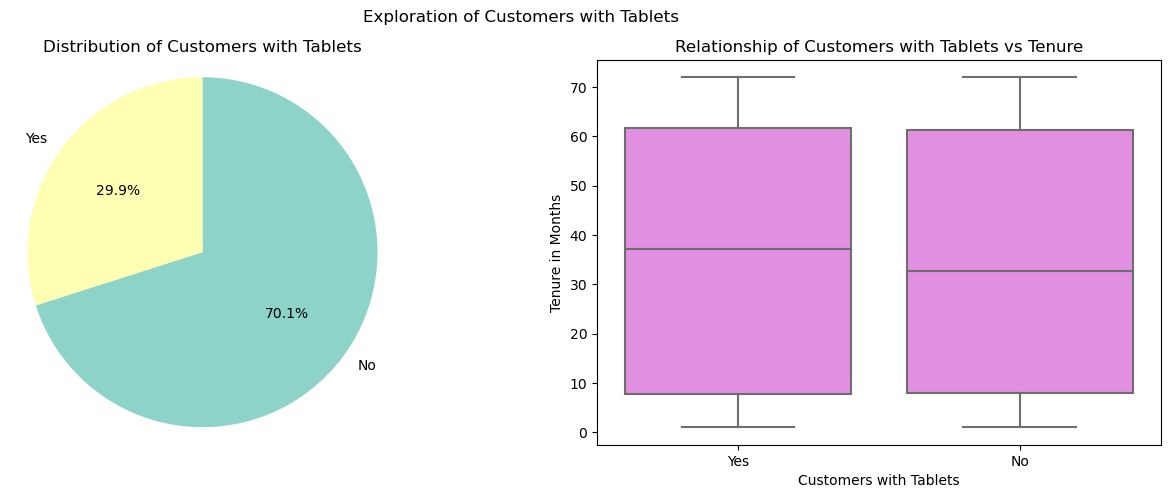

In [56]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Tablets')

#LEFT PLOT: Univariate exploration of Tablet
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Tablets')
tablet_counts = df['Tablet'].value_counts()
plt.pie(tablet_counts, labels=tablet_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Tablet vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Tablets vs Tenure')
sns.boxplot(data=df, x='Tablet', y='Tenure', color='violet')
plt.xlabel('Customers with Tablets')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

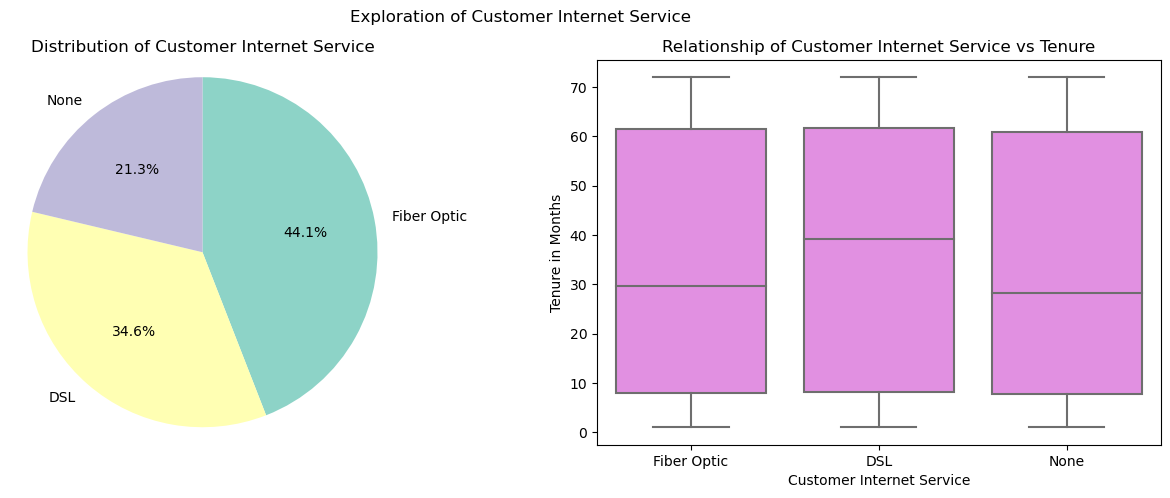

In [57]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Internet Service')

#LEFT PLOT: Univariate exploration of InternetService
plt.subplot(1,2,1)
plt.title('Distribution of Customer Internet Service')
internet_counts = df['InternetService'].value_counts()
plt.pie(internet_counts, labels=internet_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of InternetService vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Internet Service vs Tenure')
sns.boxplot(data=df, x='InternetService', y='Tenure', color='violet')
plt.xlabel('Customer Internet Service')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

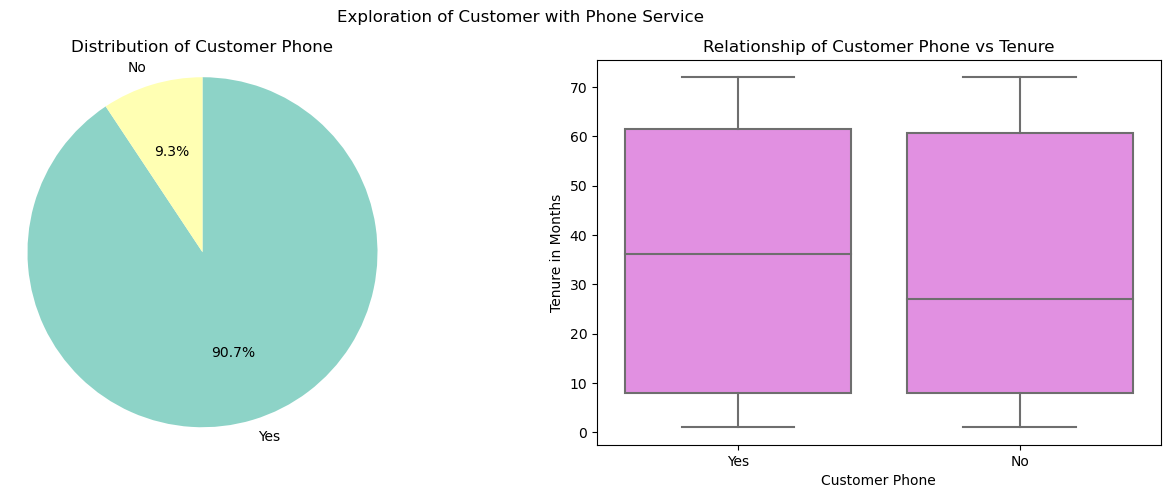

In [58]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer with Phone Service')

#LEFT PLOT: Univariate exploration of Phone
plt.subplot(1,2,1)
plt.title('Distribution of Customer Phone')
phone_counts = df['Phone'].value_counts()
plt.pie(phone_counts, labels=phone_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Phone vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Phone vs Tenure')
sns.boxplot(data=df, x='Phone', y='Tenure', color='violet')
plt.xlabel('Customer Phone')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

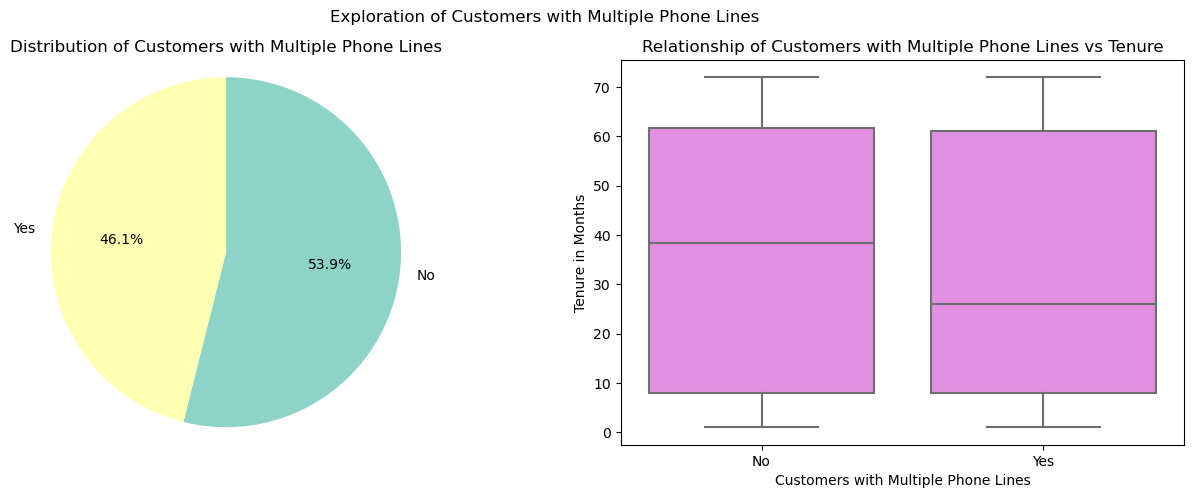

In [59]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Multiple Phone Lines')

#LEFT PLOT: Univariate exploration of Multiple
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Multiple Phone Lines')
multiple_counts = df['Multiple'].value_counts()
plt.pie(multiple_counts, labels=multiple_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of Multiple vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Multiple Phone Lines vs Tenure')
sns.boxplot(data=df, x='Multiple', y='Tenure', color='violet')
plt.xlabel('Customers with Multiple Phone Lines')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

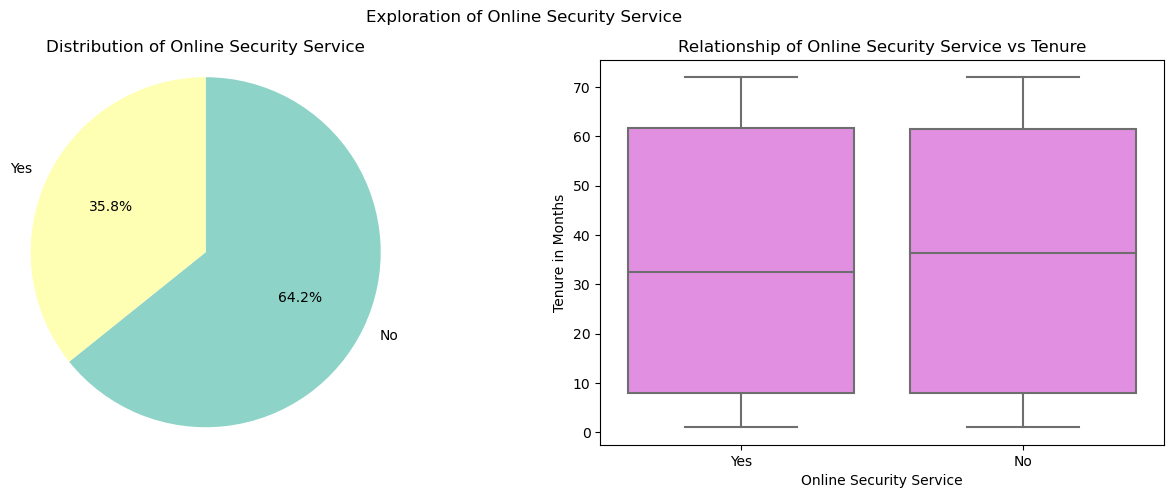

In [60]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Online Security Service')

#LEFT PLOT: Univariate exploration of OnlineSecurity
plt.subplot(1,2,1)
plt.title('Distribution of Online Security Service')
security_counts = df['OnlineSecurity'].value_counts()
plt.pie(security_counts, labels=security_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of OnlineSecurity vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Online Security Service vs Tenure')
sns.boxplot(data=df, x='OnlineSecurity', y='Tenure', color='violet')
plt.xlabel('Online Security Service')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

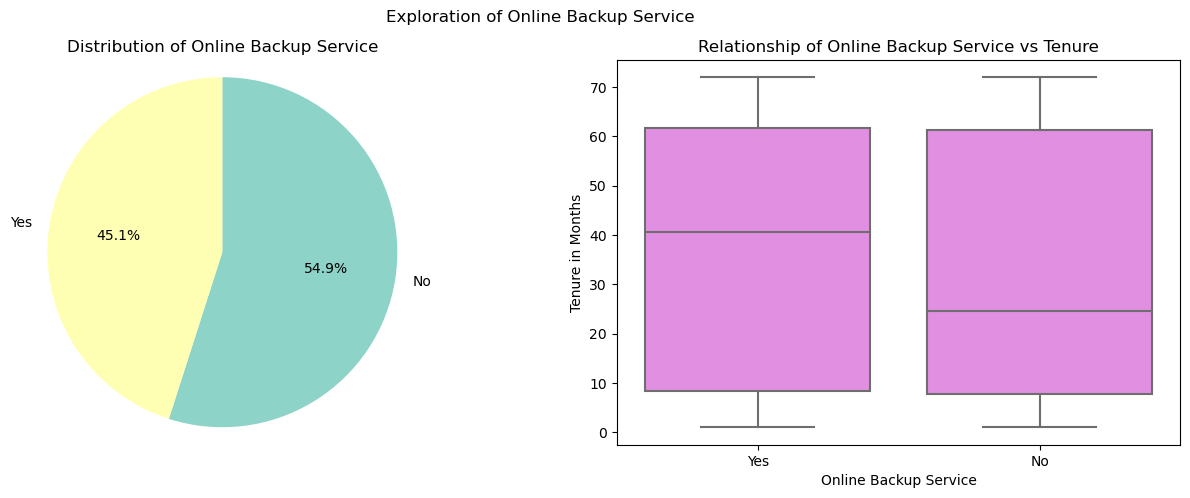

In [61]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Online Backup Service')

#LEFT PLOT: Univariate exploration of OnlineBackup
plt.subplot(1,2,1)
plt.title('Distribution of Online Backup Service')
backup_counts = df['OnlineBackup'].value_counts()
plt.pie(backup_counts, labels=backup_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of OnlineBackup vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Online Backup Service vs Tenure')
sns.boxplot(data=df, x='OnlineBackup', y='Tenure', color='violet')
plt.xlabel('Online Backup Service')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

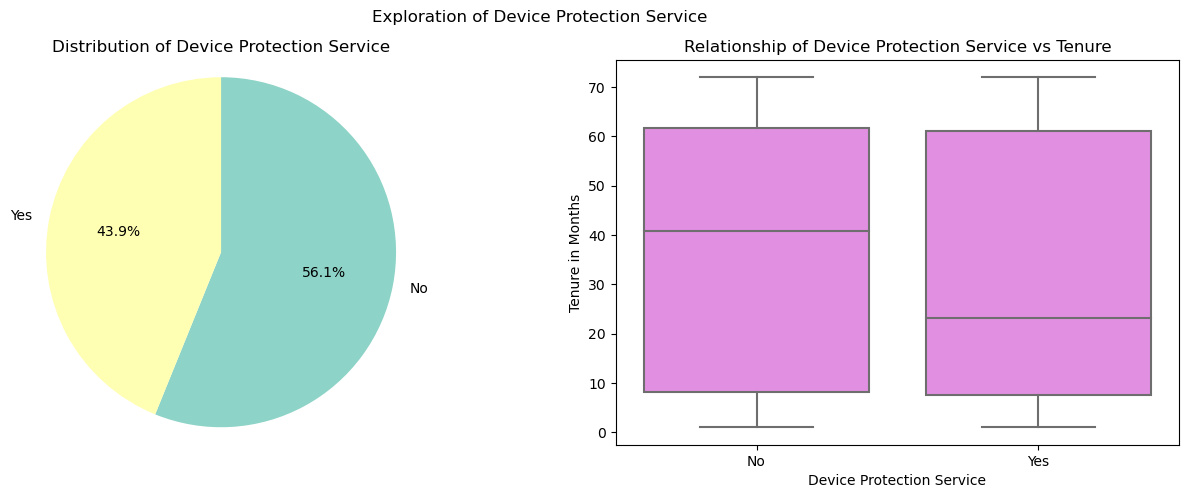

In [62]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Device Protection Service')

#LEFT PLOT: Univariate exploration of DeviceProtection
plt.subplot(1,2,1)
plt.title('Distribution of Device Protection Service')
protection_counts = df['DeviceProtection'].value_counts()
plt.pie(protection_counts, labels=protection_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of DeviceProtection vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Device Protection Service vs Tenure')
sns.boxplot(data=df, x='DeviceProtection', y='Tenure', color='violet')
plt.xlabel('Device Protection Service')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

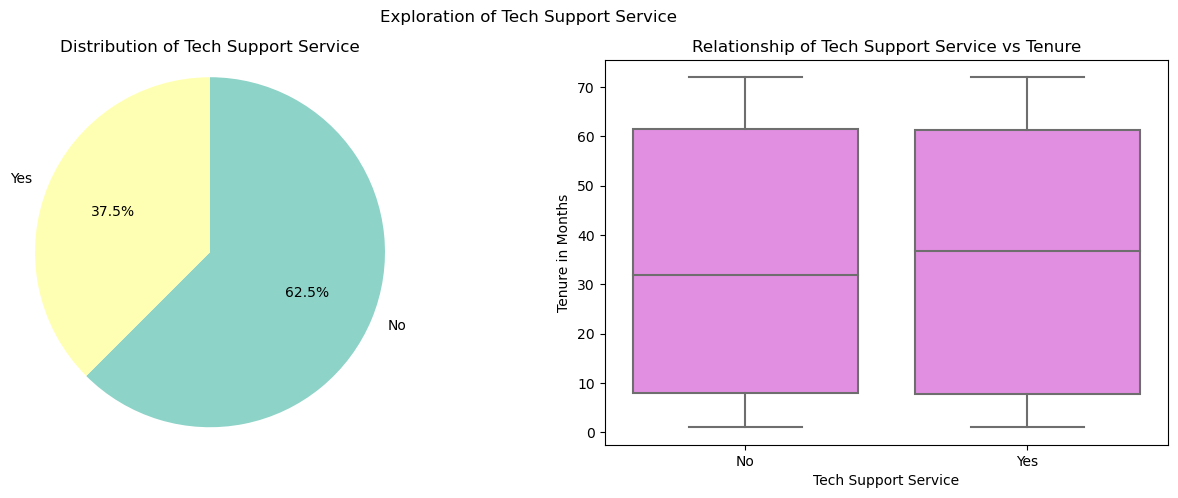

In [63]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Tech Support Service')

#LEFT PLOT: Univariate exploration of TechSupport
plt.subplot(1,2,1)
plt.title('Distribution of Tech Support Service')
support_counts = df['TechSupport'].value_counts()
plt.pie(support_counts, labels=support_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of TechSupport vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Tech Support Service vs Tenure')
sns.boxplot(data=df, x='TechSupport', y='Tenure', color='violet')
plt.xlabel('Tech Support Service')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

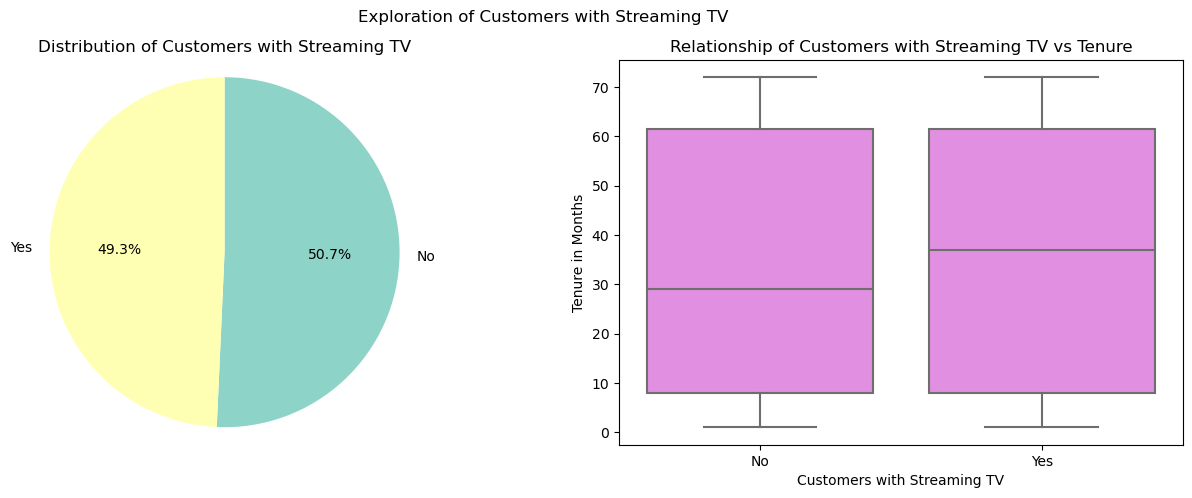

In [64]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Streaming TV')

#LEFT PLOT: Univariate exploration of StreamingTV
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Streaming TV')
tv_counts = df['StreamingTV'].value_counts()
plt.pie(tv_counts, labels=tv_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of StreamingTV vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Streaming TV vs Tenure')
sns.boxplot(data=df, x='StreamingTV', y='Tenure', color='violet')
plt.xlabel('Customers with Streaming TV')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

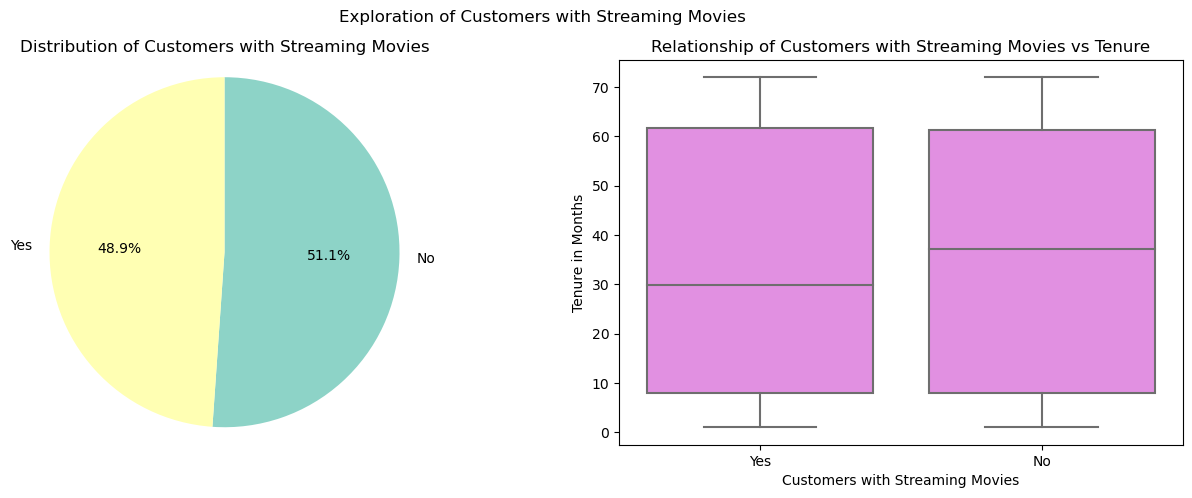

In [65]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Streaming Movies')

#LEFT PLOT: Univariate exploration of StreamingMovies
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Streaming Movies')
movie_counts = df['StreamingMovies'].value_counts()
plt.pie(movie_counts, labels=movie_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of StreamingMovies vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Streaming Movies vs Tenure')
sns.boxplot(data=df, x='StreamingMovies', y='Tenure', color='violet')
plt.xlabel('Customers with Streaming Movies')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

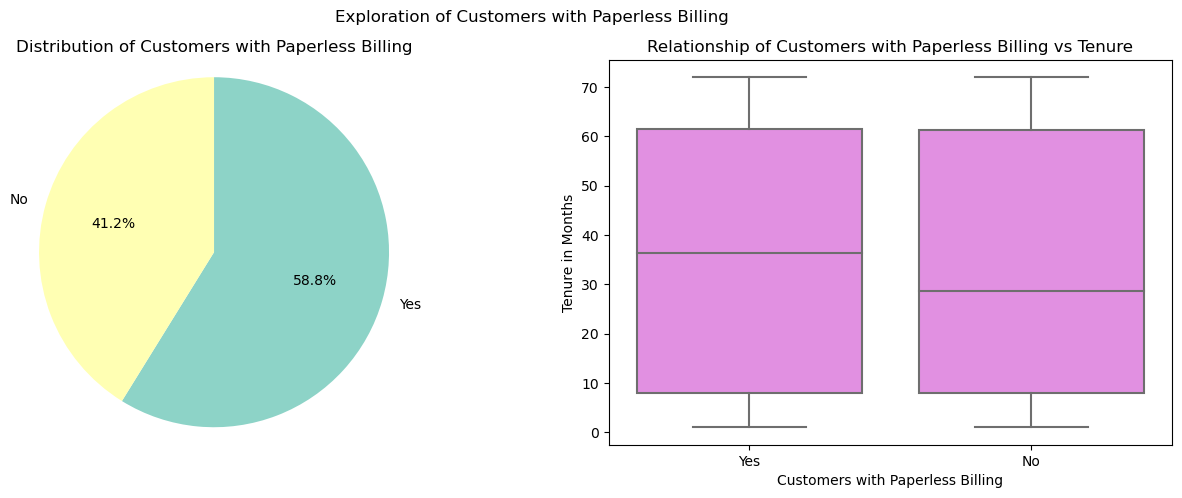

In [66]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customers with Paperless Billing')

#LEFT PLOT: Univariate exploration of PaperlessBilling
plt.subplot(1,2,1)
plt.title('Distribution of Customers with Paperless Billing')
billing_counts = df['PaperlessBilling'].value_counts()
plt.pie(billing_counts, labels=billing_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of PaperlessBilling vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customers with Paperless Billing vs Tenure')
sns.boxplot(data=df, x='PaperlessBilling', y='Tenure', color='violet')
plt.xlabel('Customers with Paperless Billing')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

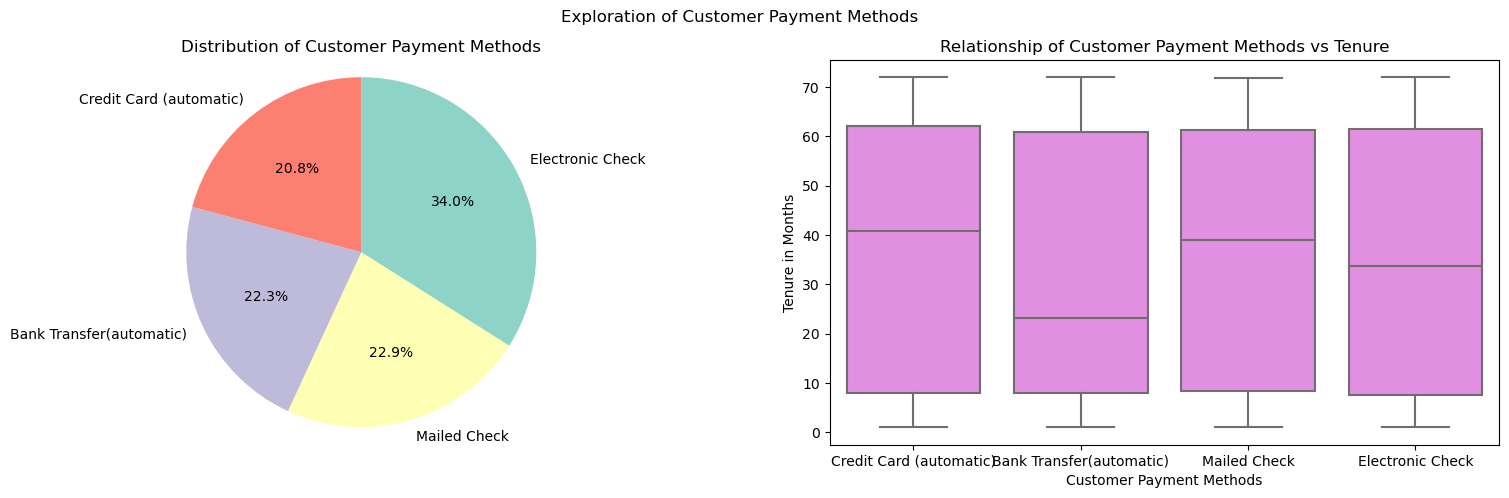

In [67]:
plt.figure(figsize = [19,5])
plt.suptitle('Exploration of Customer Payment Methods')

#LEFT PLOT: Univariate exploration of PaymentMethod
plt.subplot(1,2,1)
plt.title('Distribution of Customer Payment Methods')
pay_counts = df['PaymentMethod'].value_counts()
plt.pie(pay_counts, labels=pay_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('Set3'), counterclock=False)
plt.axis('square');

#RIGHT PLOT: Bivariate exploration of PaymentMethod vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Payment Methods vs Tenure')
sns.boxplot(data=df, x='PaymentMethod', y='Tenure', color='violet')
plt.xlabel('Customer Payment Methods')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

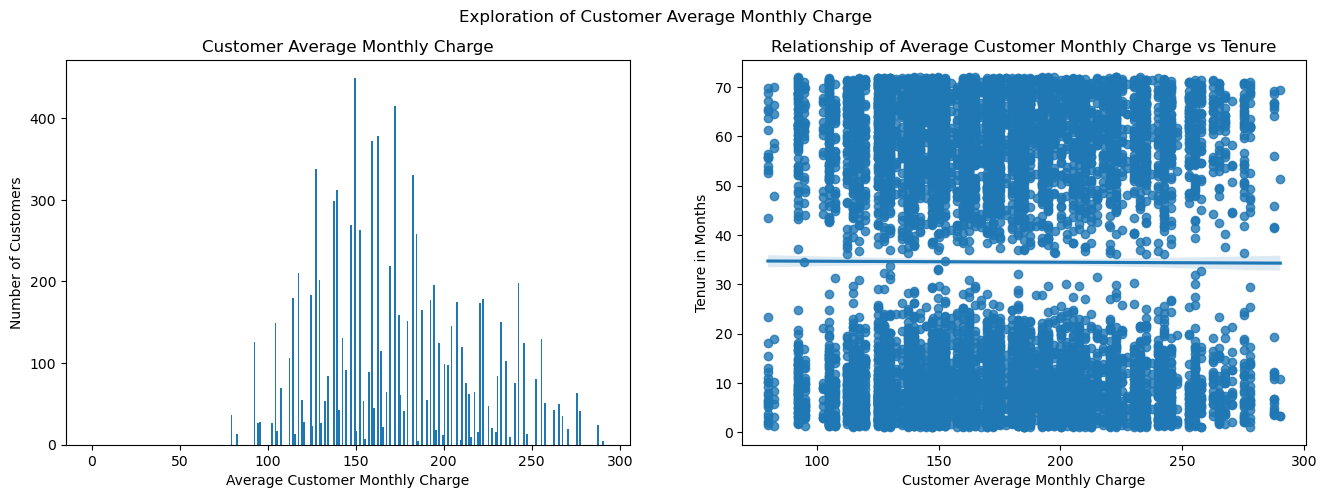

In [68]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Average Monthly Charge')

#LEFT PLOT: Univariate exploration of MonthlyCharge
plt.subplot(1,2,1)
plt.title('Customer Average Monthly Charge')
bins = np.arange(0, df.MonthlyCharge.max() +1,1)
plt.hist(data=df, x='MonthlyCharge', bins=bins)
plt.xlabel('Average Customer Monthly Charge')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of MonthlyCharge vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Average Customer Monthly Charge vs Tenure')
sns.regplot(data=df, x='MonthlyCharge', y='Tenure')
plt.xlabel('Customer Average Monthly Charge')
plt.ylabel('Tenure in Months')

Text(0, 0.5, 'Tenure in Months')

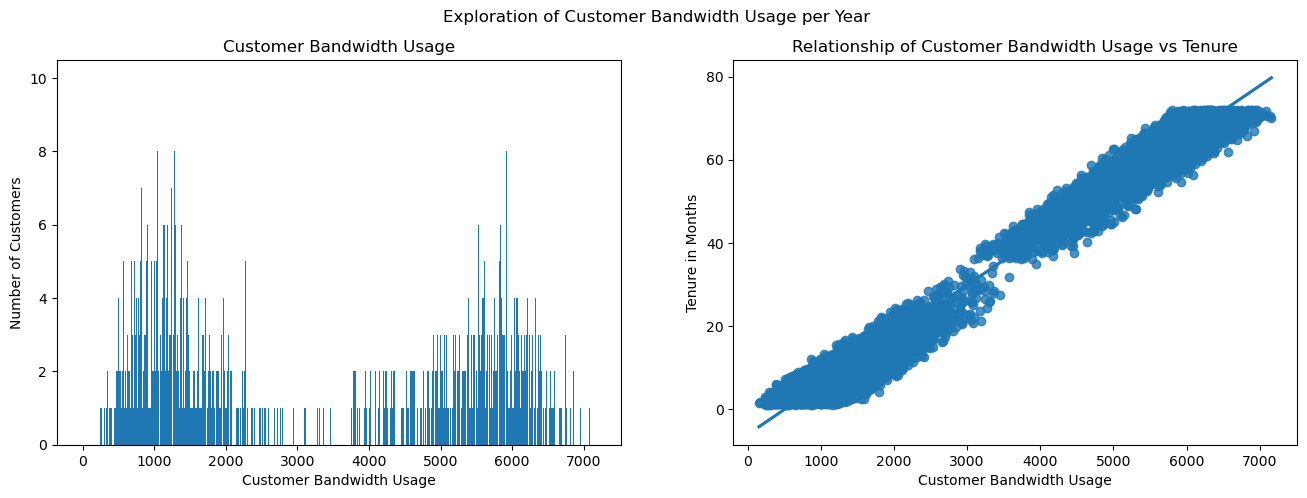

In [69]:
plt.figure(figsize = [16,5])
plt.suptitle('Exploration of Customer Bandwidth Usage per Year')

#LEFT PLOT: Univariate exploration of Bandwidth_GB_Year
plt.subplot(1,2,1)
plt.title('Customer Bandwidth Usage')
bins = np.arange(0, df.Bandwidth_GB_Year.max() +1,1)
plt.hist(data=df, x='Bandwidth_GB_Year', bins=bins)
plt.xlabel('Customer Bandwidth Usage')
plt.ylabel('Number of Customers');

#RIGHT PLOT: Bivariate exploration of Bandwidth_GB_Year vs Tenure
plt.subplot(1,2,2)
plt.title('Relationship of Customer Bandwidth Usage vs Tenure')
sns.regplot(data=df, x='Bandwidth_GB_Year', y='Tenure')
plt.xlabel('Customer Bandwidth Usage')
plt.ylabel('Tenure in Months')

### C4: Data Transformation 

Multiple linear regression analysis requires numerical values. Therefore, in order to perform multiple linear regression analysis on this dataset, some of the data needs to be converted from categorical data to numerical. For this analysis I will transform all Yes/No answers to 1/0. For the categorical variables that are nominal, I will be using one hot encoding. This is a technique that uses dummy columns to represent the data in binary form. For example, the gender category would be split to gender-male and gender-female. If the entry is male, there would be a 1 under the gender-male column and a 0 under gender-female, the same would be true in reverse for an entry of female. If the entry for gender is nonbinary, there would be a 0 under each column gender-male and gender-female. In order to do this, I will be using the pandas get_dummies() function. 

In [70]:
#Convert columns from string to category for boolean conversion
df['Churn'] = df['Churn'].astype('category')
df['Techie'] = df['Techie'].astype('category')
df['Port_modem'] = df['Port_modem'].astype('category')
df['Tablet'] = df['Tablet'].astype('category')
df['Phone'] = df['Phone'].astype('category')
df['Multiple'] = df['Multiple'].astype('category')
df['OnlineSecurity'] = df['OnlineSecurity'].astype('category')
df['OnlineBackup'] = df['OnlineBackup'].astype('category')
df['DeviceProtection'] = df['DeviceProtection'].astype('category')
df['TechSupport'] = df['TechSupport'].astype('category')
df['StreamingTV'] = df['StreamingTV'].astype('category')
df['StreamingMovies'] = df['StreamingMovies'].astype('category')
df['PaperlessBilling'] = df['PaperlessBilling'].astype('category')


#Convert columns from string to category for one-hot encoding 
df['Marital'] = df['Marital'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['Contract'] = df['Contract'].astype('category')
df['InternetService'] = df['InternetService'].astype('category')
df['PaymentMethod'] = df['PaymentMethod'].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CaseOrder             10000 non-null  int64   
 1   Customer_id           10000 non-null  object  
 2   Interaction           10000 non-null  object  
 3   UID                   10000 non-null  object  
 4   City                  10000 non-null  object  
 5   State                 10000 non-null  object  
 6   County                10000 non-null  object  
 7   Zip                   10000 non-null  int64   
 8   Lat                   10000 non-null  float64 
 9   Lng                   10000 non-null  float64 
 10  Population            10000 non-null  int64   
 11  Area                  10000 non-null  object  
 12  TimeZone              10000 non-null  object  
 13  Job                   10000 non-null  object  
 14  Children              10000 non-null  int64   
 15  Age

In [71]:
#Convert categorical data to binary using one hot encoding 
cdf=pd.get_dummies(data=df, dtype=int, drop_first=True, 
                  columns=['Gender', 'Marital', 'Contract', 'InternetService', 'PaymentMethod', 
                           'Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'Multiple', 'OnlineSecurity', 
                           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                           'PaperlessBilling'])
cdf.info()

cdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 58 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CaseOrder                              10000 non-null  int64  
 1   Customer_id                            10000 non-null  object 
 2   Interaction                            10000 non-null  object 
 3   UID                                    10000 non-null  object 
 4   City                                   10000 non-null  object 
 5   State                                  10000 non-null  object 
 6   County                                 10000 non-null  object 
 7   Zip                                    10000 non-null  int64  
 8   Lat                                    10000 non-null  float64
 9   Lng                                    10000 non-null  float64
 10  Population                             10000 non-null  int64  
 11  Are

CaseOrder Customer_id                           Interaction  \
0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                UID         City State                 County  \
0  e885b299883d4f9fb18e39c75155d990  Point Baker    AK  Prince of Wales-Hyder   
1  f2de8bef964785f41a2959829830fb8a  West Branch    MI                 Ogemaw   
2  f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR                Yamhill   
3  dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA              San Diego   
4  aabb64a116e83fdc4befc1fbab1663f9    Needville    TX              Fort Bend   

     Zip       Lat        Lng  ...  Tablet_Yes Phone_Yes Multiple_Yes  \
0  99927  56.25100 -133.37571  ...           1         1            0   
1  48661  44.32893  -84.24080  ...           1         1            1   
2  97148  45.35589 -123.24657  ...           0         1            1   
3  92014  32.96687 -117.24798  ...           0         1            0   
4  77461  29.38012  -95.80673  ...           0         0            0   

  OnlineSecurity_Yes  OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  \
0                  1                 1                     0                0   
1                  1                 0                     0                0   
2                  0                 0                     0                0   
3                  1                 0                     0                0   
4                  0                 0                     0                1   

   StreamingTV_Yes  StreamingMovies_Yes  PaperlessBilling_Yes  
0                0                    1                     1  
1                1                    1                     1  
2                0                    1                     1  
3                1                    0                     1  
4                1                    0                     0  

[5 rows x 58 columns]

### C5: Prepared Dataset

In [72]:
#Create new df with only variables used in model
df = cdf[['Tenure', 'Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes',
        'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']]

#Save dataframe to CSV
df.to_csv('cmf_d208_t1_clean.csv', index=False)

### D1: Initial Model 

In [73]:
#Multiple Linear Regression Model 
#Setting the values for x and y variables
y = df.Tenure
X = df[['Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes',
        'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y,X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.780e+07
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:42   Log-Likelihood:                 8133.7
No. Observations:               10000   AIC:                        -1.620e+04
Df Residuals:                    9965   BIC:                        -1.595e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [74]:
results.resid.std(ddof=X.shape[1])

0.10746843137083249

### D2: Justification of Model Reduction
In my analysis, there was a warning given that there are possibly strong multicolinearity issues with this model. In order to use multiple regression, one of the assumptions is that our independent variables do not have a high multicolinearity. In order to reduce this possibility, I am going to check using Variance Influence Factor (VIF). When using VIF, you should remove any variables that have a score of 10 or larger. 
After checking the VIF scores, I found that Monthly Charge and Email both got a score over 10. I will remove them and see if that fixes our model. 

In [75]:
#Using VIF to see if variables should be eliminated due to multicollinearity
X = df[['Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes',
        'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure', 'MonthlyCharge', 'Bandwidth_GB_Year']]
vif_df = pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]
print(vif_df)

                                  feature         VIF
0                                Children    1.943566
1                                     Age    7.302168
2                                  Income    2.963571
3                             Gender_Male    1.940301
4                        Gender_Nonbinary    1.047753
5                   Marital_Never Married    1.482078
6                       Marital_Separated    1.498876
7                         Marital_Widowed    1.500973
8                       Contract_One year    1.504224
9                       Contract_Two Year    1.590363
10            InternetService_Fiber Optic    3.838167
11                   InternetService_None    1.708141
12  PaymentMethod_Credit Card (automatic)    1.915536
13         PaymentMethod_Electronic Check    2.495479
14             PaymentMethod_Mailed Check    2.003335
15                              Churn_Yes    2.673063
16                             Techie_Yes    1.212854
17                         P

In [76]:
#Eliminated MonthlyCharge (VIF=182.48) and rerunning analysis 
X = df[['Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes',
        'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Email', 'Contacts', 'Yearly_equip_failure','Bandwidth_GB_Year']]

vif_df=pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]

print(vif_df)

                                  feature        VIF
0                                Children   1.930521
1                                     Age   6.859332
2                                  Income   2.902531
3                             Gender_Male   1.931736
4                        Gender_Nonbinary   1.047082
5                   Marital_Never Married   1.471169
6                       Marital_Separated   1.490089
7                         Marital_Widowed   1.491530
8                       Contract_One year   1.481999
9                       Contract_Two Year   1.569265
10            InternetService_Fiber Optic   2.290761
11                   InternetService_None   1.627932
12  PaymentMethod_Credit Card (automatic)   1.891697
13         PaymentMethod_Electronic Check   2.451036
14             PaymentMethod_Mailed Check   1.965170
15                              Churn_Yes   2.565817
16                             Techie_Yes   1.210132
17                         Port_modem_Yes   1.

In [77]:
#Eliminated Email (VIF=12.97) and rerunning analysis 
X = df[['Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes',
        'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure','Bandwidth_GB_Year']]

vif_df=pd.DataFrame()
vif_df["feature"] = X.columns

vif_df["VIF"] = [variance_inflation_factor(X.values, i)
                for i in range(len(X.columns))]

print(vif_df)

                                  feature       VIF
0                                Children  1.922104
1                                     Age  6.635348
2                                  Income  2.879114
3                             Gender_Male  1.921995
4                        Gender_Nonbinary  1.046771
5                   Marital_Never Married  1.464286
6                       Marital_Separated  1.484659
7                         Marital_Widowed  1.485928
8                       Contract_One year  1.477722
9                       Contract_Two Year  1.562972
10            InternetService_Fiber Optic  2.264573
11                   InternetService_None  1.616338
12  PaymentMethod_Credit Card (automatic)  1.870217
13         PaymentMethod_Electronic Check  2.424551
14             PaymentMethod_Mailed Check  1.941142
15                              Churn_Yes  2.546745
16                             Techie_Yes  1.209889
17                         Port_modem_Yes  1.909981
18          

In [78]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns you want to scale (excluding non-numeric columns)
numeric_columns = df.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the selected columns
df_minmax = pd.DataFrame(scaler.fit_transform(df[numeric_columns]), columns=numeric_columns)

# Print the scaled DataFrame
print(df_minmax)

        Tenure  Children       Age    Income  Gender_Male  Gender_Nonbinary  \
0     0.081624       0.0  0.704225  0.109120          1.0               0.0   
1     0.002203       0.1  0.126761  0.082599          0.0               0.0   
2     0.207804       0.4  0.450704  0.035818          0.0               0.0   
3     0.226580       0.1  0.422535  0.071848          1.0               0.0   
4     0.009447       0.0  0.915493  0.153646          1.0               0.0   
...        ...       ...       ...       ...          ...               ...   
9995  0.946448       0.3  0.070423  0.214174          1.0               0.0   
9996  0.845647       0.4  0.422535  0.130653          1.0               0.0   
9997  0.653764       0.1  0.422535  0.176501          0.0               0.0   
9998  0.987272       0.1  0.295775  0.063117          1.0               0.0   
9999  0.878190       0.1  0.140845  0.033542          1.0               0.0   

      Marital_Never Married  Marital_Separated  Mar

In [79]:
#Reduced model by eliminating MonthlyCharge and Email due to multicollinearity issues
#Continue reducing model by removing highest p-value (alpha=0.05)

#Backward Elimination 1: Find highest p-value over 0.05
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Income', 'Gender_Male', 'Gender_Nonbinary', 
        'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Contract_One year',
        'Contract_Two Year', 'InternetService_Fiber Optic', 'InternetService_None', 
        'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes',
        'Tablet_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Contacts', 'Yearly_equip_failure','Bandwidth_GB_Year']].assign(const=1)

model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.067e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                 39690.
No. Observations:               10000   AIC:                        -7.931e+04
Df Residuals:                    9967   BIC:                        -7.908e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [80]:
#Backward Elimination 1: Find highest p-value over 0.05
#Eliminating Contacts p-value 0.717
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Income', 'Gender_Nonbinary','Gender_Male', 'Marital_Never Married', 'Marital_Separated',
        'Marital_Widowed', 'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes', 'Tablet_Yes', 
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 'Outage_sec_perweek',
        'Yearly_equip_failure','Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.134e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                 39690.
No. Observations:               10000   AIC:                        -7.932e+04
Df Residuals:                    9968   BIC:                        -7.909e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [81]:
#Backward Elimination 2: Find highest p-value over 0.05
#Eliminating Outage_sec_perweek p-value 0.558
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Income', 'Gender_Nonbinary','Gender_Male', 'Marital_Never Married', 'Marital_Separated',
        'Marital_Widowed', 'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Techie_Yes', 'Port_modem_Yes', 'Tablet_Yes', 
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 
        'Yearly_equip_failure','Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.205e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                 39690.
No. Observations:               10000   AIC:                        -7.932e+04
Df Residuals:                    9969   BIC:                        -7.909e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [82]:
#Backward Elimination 3: Find highest p-value over 0.05
#Eliminating Techie_Yes p-value 0.514
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Income', 'Gender_Nonbinary','Gender_Male', 'Marital_Never Married', 'Marital_Separated',
        'Marital_Widowed', 'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 
        'Yearly_equip_failure','Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.281e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                 39689.
No. Observations:               10000   AIC:                        -7.932e+04
Df Residuals:                    9970   BIC:                        -7.910e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [83]:
#Backward Elimination 4: Find highest p-value over 0.05
#Eliminating Marital_Separated p-value 0.462
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Income', 'Gender_Nonbinary','Gender_Male', 'Marital_Never Married', 
        'Marital_Widowed', 'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 
        'Yearly_equip_failure','Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.363e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                 39689.
No. Observations:               10000   AIC:                        -7.932e+04
Df Residuals:                    9971   BIC:                        -7.911e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [84]:
#Backward Elimination 5: Find highest p-value over 0.05
#Eliminating Yearly_equip_failure p-value 0.461
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Income', 'Gender_Nonbinary','Gender_Male', 'Marital_Never Married', 
        'Marital_Widowed', 'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 
        'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.450e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                 39689.
No. Observations:               10000   AIC:                        -7.932e+04
Df Residuals:                    9972   BIC:                        -7.912e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [85]:
#Backward Elimination 6: Find highest p-value over 0.05
#Eliminating Marital_Never Married p-value 0.557
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Income', 'Gender_Nonbinary','Gender_Male', 
        'Marital_Widowed', 'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 
        'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.545e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:51   Log-Likelihood:                 39689.
No. Observations:               10000   AIC:                        -7.932e+04
Df Residuals:                    9973   BIC:                        -7.913e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [86]:
#Backward Elimination 7: Find highest p-value over 0.05
#Eliminating Marital_Widowed p-value 0.537
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Income', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 
        'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.647e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39689.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9974   BIC:                        -7.914e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [87]:
#Backward Elimination 8: Find highest p-value over 0.05
#Eliminating Income p-value 0.399
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes', 'Tablet_Yes', 
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 
        'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.757e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39688.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9975   BIC:                        -7.915e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [88]:
#Backward Elimination 9: Find highest p-value over 0.05
#Eliminating Tablet_Yes p-value 0.386
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'PaymentMethod_Mailed Check', 'Churn_Yes', 'Port_modem_Yes',  
        'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes','OnlineBackup_Yes', 'DeviceProtection_Yes',
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes', 
        'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.877e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39688.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9976   BIC:                        -7.915e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [89]:
#Backward Elimination 10: Find highest p-value over 0.05
#Eliminating PaymentMethod_Mailed Check p-value 0.321
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 'PaymentMethod_Electronic Check',
        'Churn_Yes', 'Port_modem_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
        'StreamingMovies_Yes','PaperlessBilling_Yes', 'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.008e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39687.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9977   BIC:                        -7.916e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [90]:
#Backward Elimination 11: Find highest p-value over 0.05
#Eliminating PaymentMethod_Electronic Check p-value 0.464
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'PaymentMethod_Credit Card (automatic)', 
        'Churn_Yes', 'Port_modem_Yes', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
        'StreamingMovies_Yes','PaperlessBilling_Yes', 'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.151e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39687.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9978   BIC:                        -7.917e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [91]:
#Backward Elimination 12: Find highest p-value over 0.05
#Eliminating PaymentMethod_Credit Card (automatic) p-value 0.473
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'Churn_Yes', 'Port_modem_Yes', 'Phone_Yes', 
        'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes','PaperlessBilling_Yes',
        'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.309e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39687.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9979   BIC:                        -7.918e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [92]:
#Backward Elimination 13: Find highest p-value over 0.05
#Eliminating PaperlessBilling_Yes p-value 0.228
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'Churn_Yes', 'Port_modem_Yes', 'Phone_Yes', 
        'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
        'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.483e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39686.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9980   BIC:                        -7.919e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [93]:
#Backward Elimination 14: Find highest p-value over 0.05
#Eliminating Phone_Yes p-value 0.127
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'Churn_Yes', 'Port_modem_Yes', 
        'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 
        'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
        'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.676e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39685.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9981   BIC:                        -7.919e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

In [94]:
#Backward Elimination 15: Find highest p-value over 0.05
#Eliminating Port_modem_Yes p-value 0.073
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'Churn_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes', 'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.891e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:52   Log-Likelihood:                 39683.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9982   BIC:                        -7.920e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

### D3: Reduced Model

In [95]:
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'Churn_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes', 'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.891e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:06:53   Log-Likelihood:                 39683.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9982   BIC:                        -7.920e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

### E1: Model Comparison

Both the initial model and reduced models have a R-Square value of 1, meaning that the response variables can be perfectly explained by the predictor variables. The initial model also has a residual standard error value 0.107 and the reduced model has a residual standard error value of 0.0046. The smaller the residual standard error, the better a model fits a dataset. 

In [96]:
results.resid.std(ddof=X.shape[1])

0.004578561347851453

### E2: Output and Calculations
#### Residual plots for reduced model:

C:\Users\Crystal\anaconda3\Lib\site-packages\statsmodels\graphics\regressionplots.py:430: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  fig = abline_plot(0, fitted_line.params[0], color='k', ax=ax)


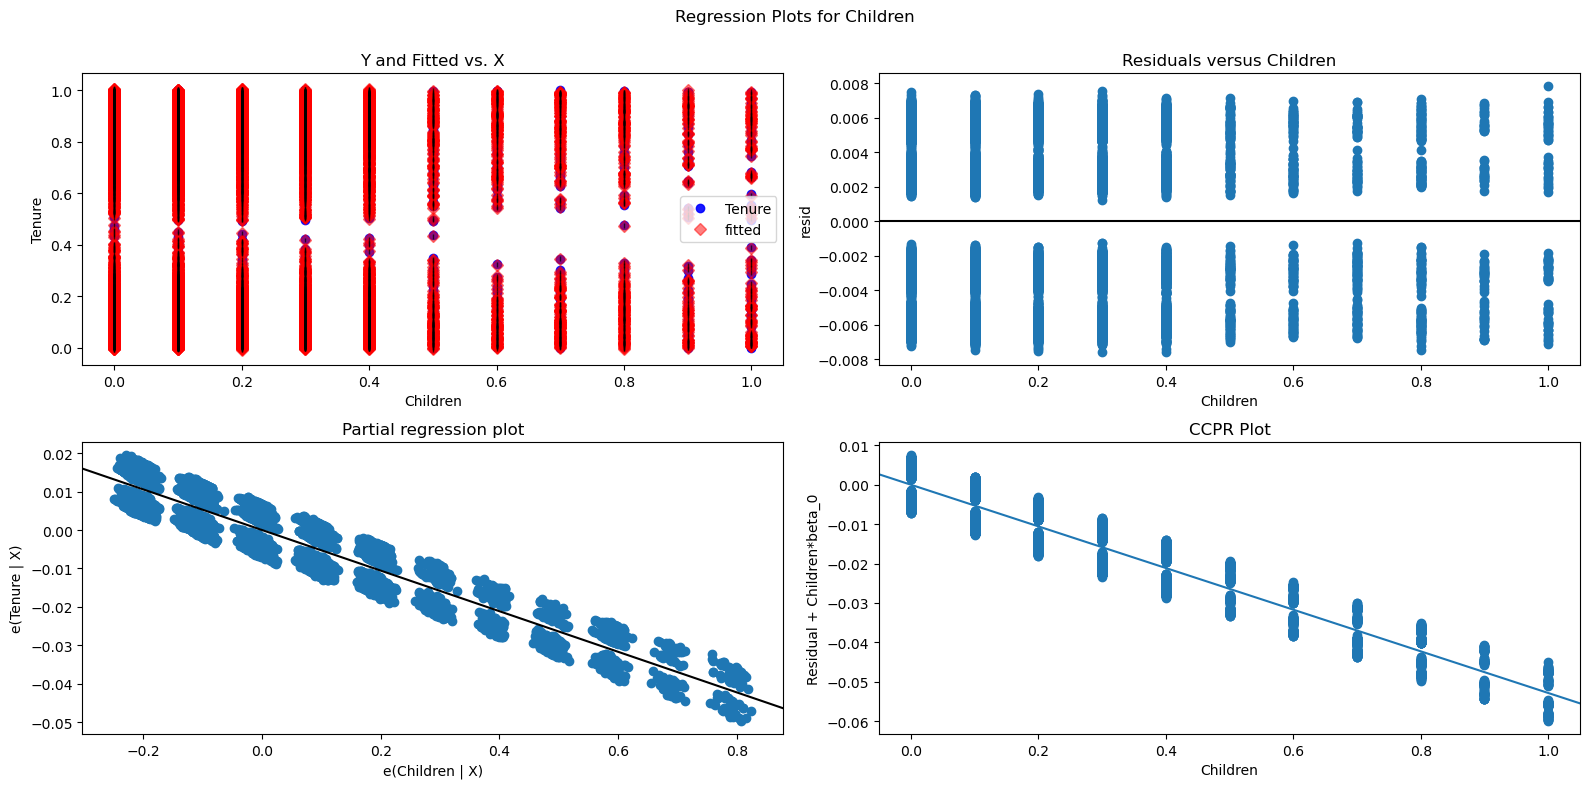

In [97]:
#Residual plot for Children
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Children', fig=fig);

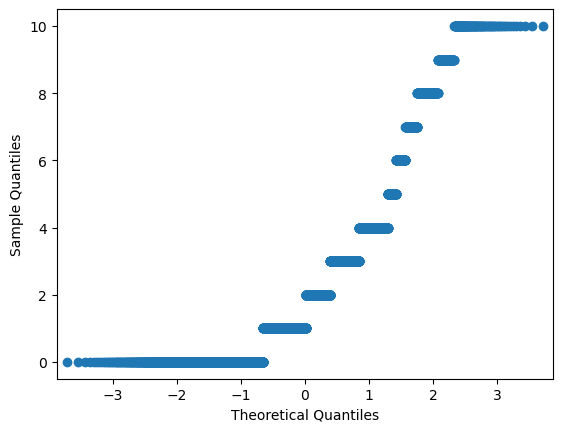

In [98]:
#Q-Q plot for Children
fig=sm.qqplot(df['Children'])
plt.show()

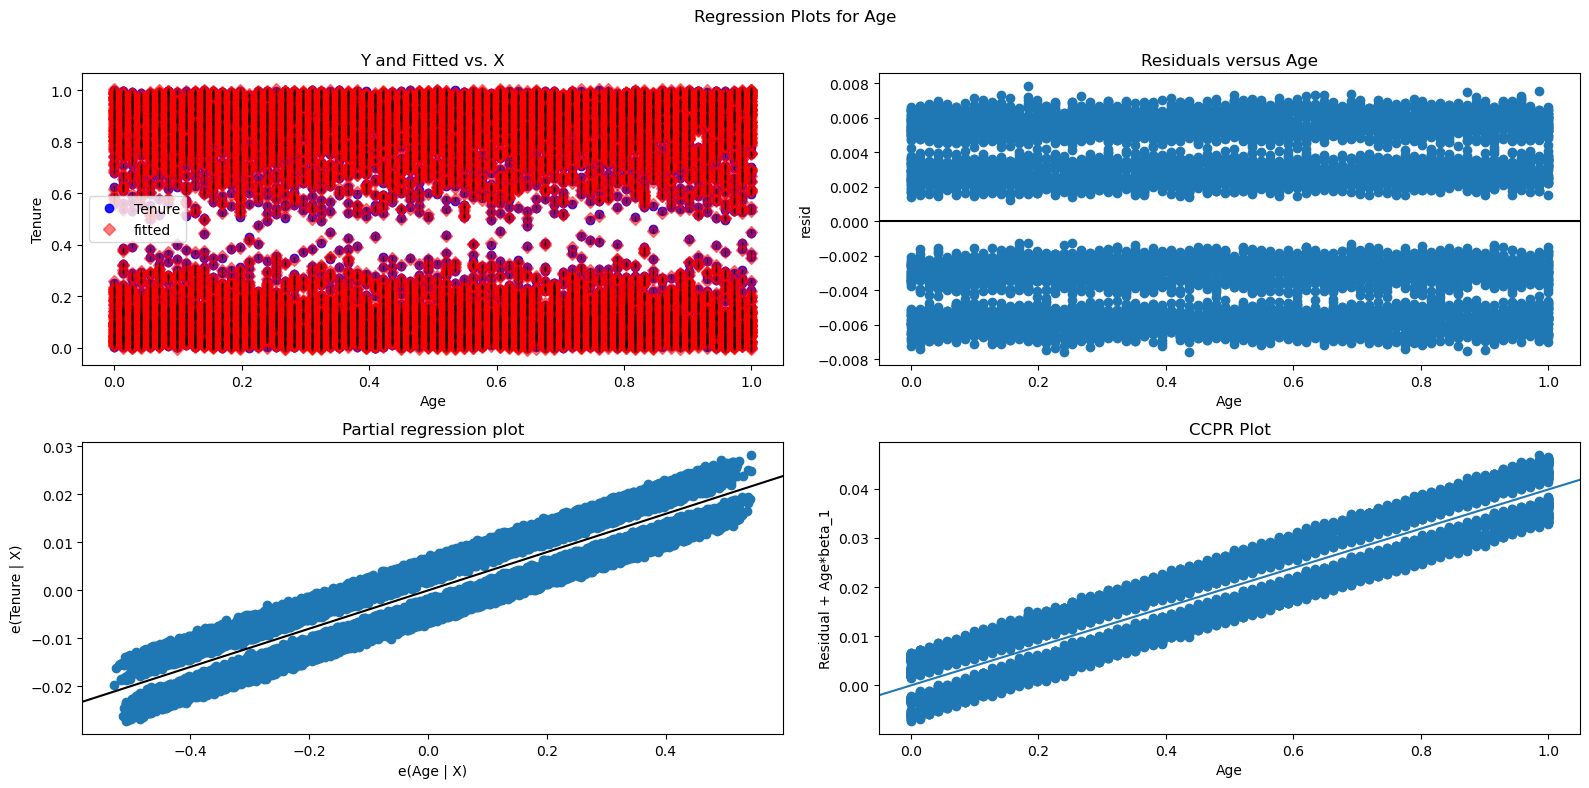

In [99]:
#Residual plot for Age
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Age', fig=fig);

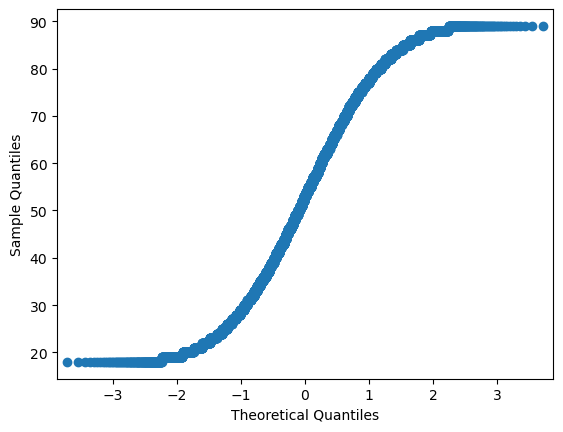

In [100]:
#Q-Q plot for Age
fig = sm.qqplot(df['Age'])
plt.show()

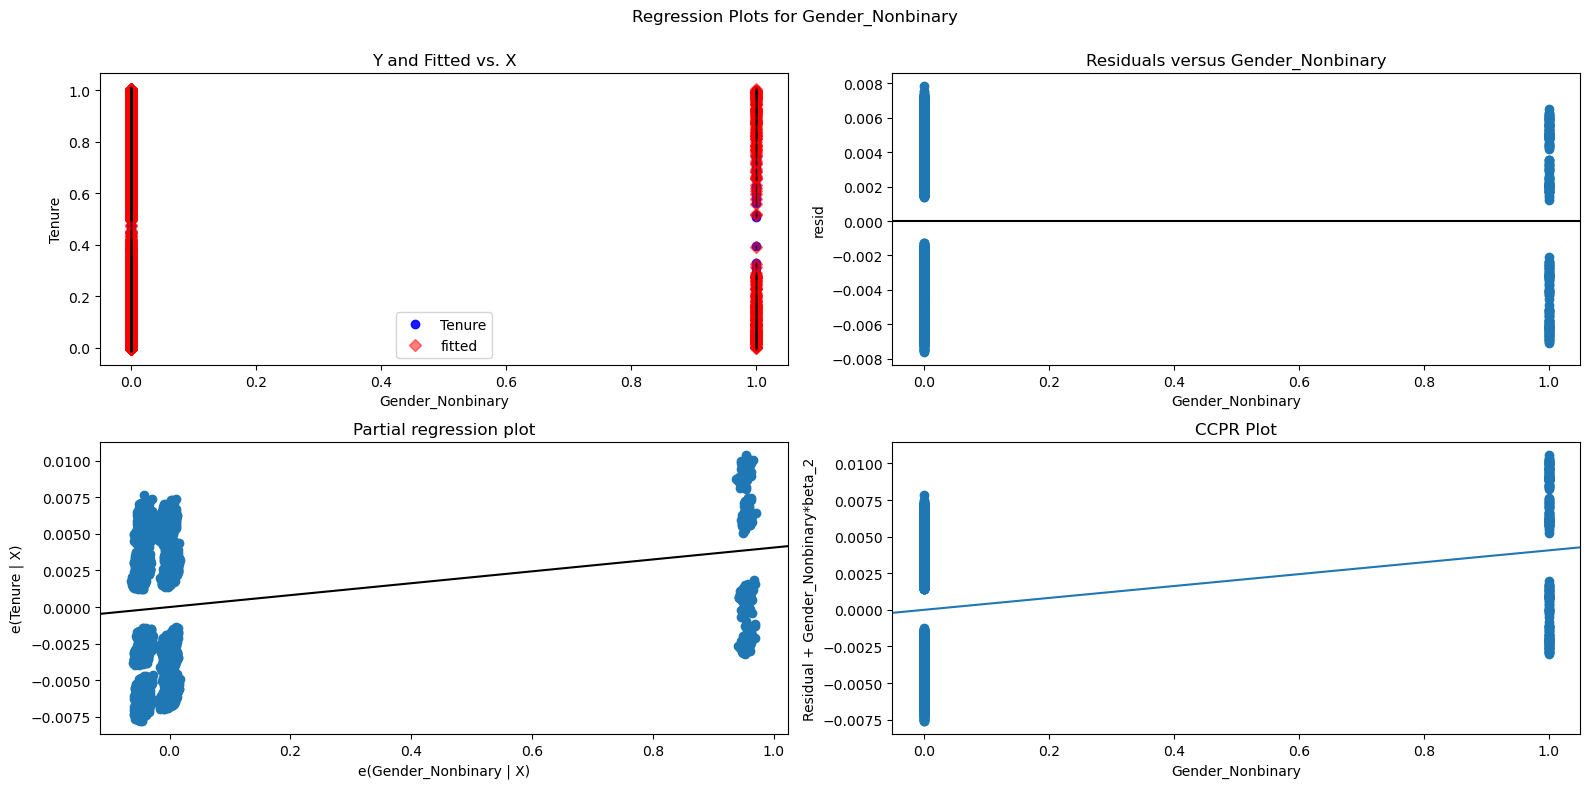

In [101]:
#Residual plot for Gender_Nonbinary
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Gender_Nonbinary', fig=fig);

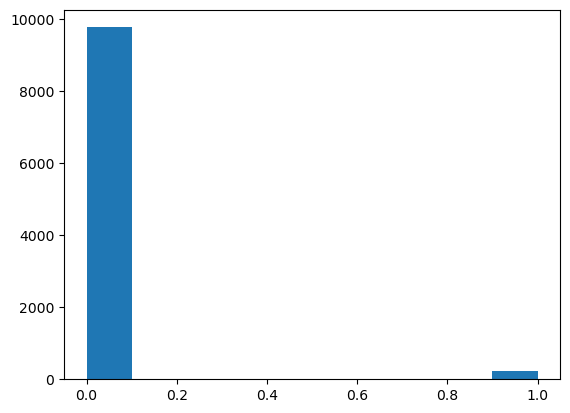

In [102]:
#Histogram for Gender_Nonbinary
plt.hist(df['Gender_Nonbinary'])
plt.show()

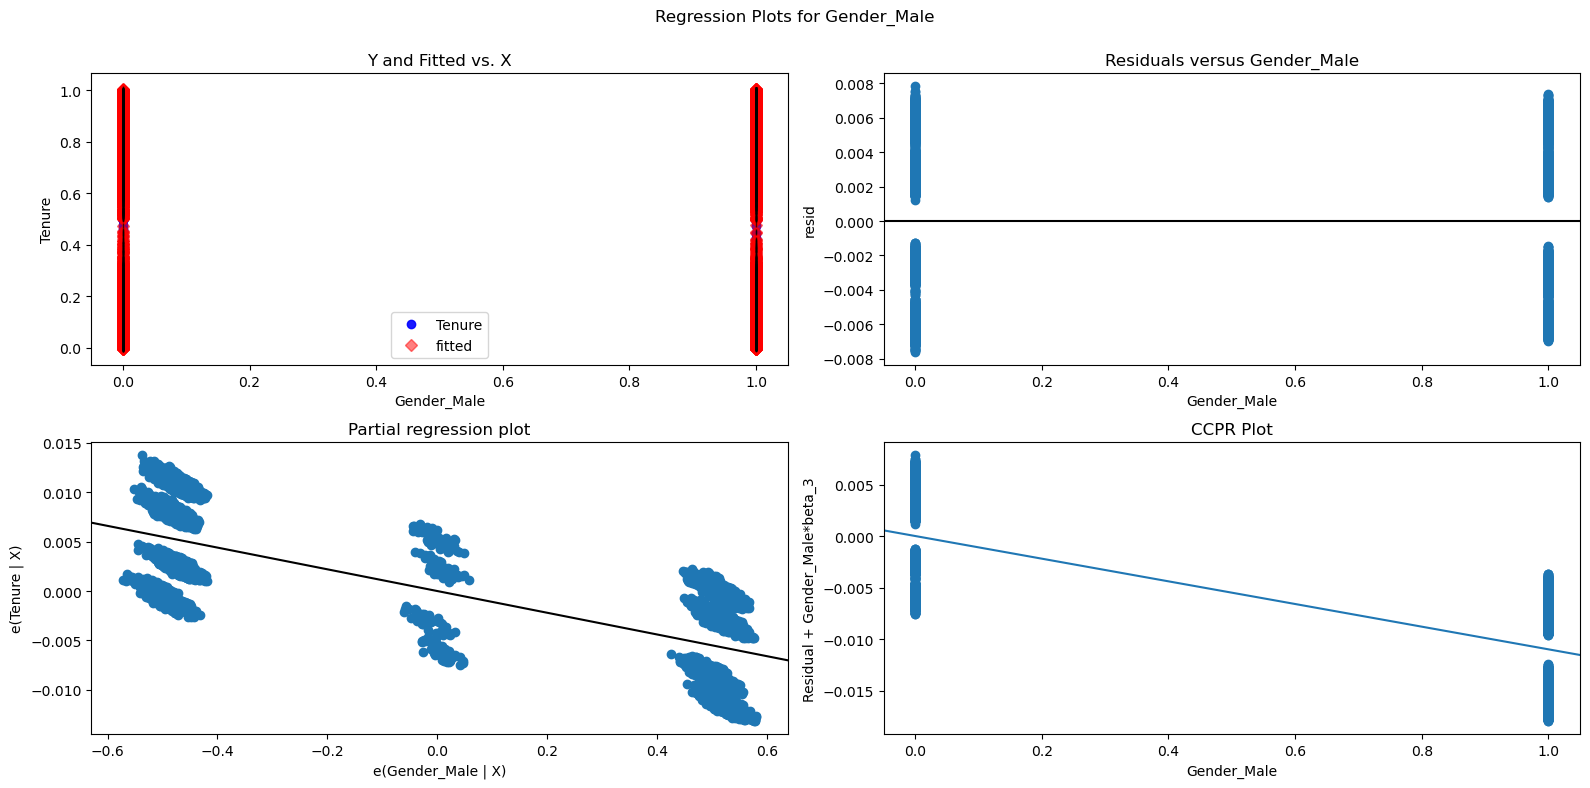

In [103]:
#Residual plot for Gender_Male
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Gender_Male', fig=fig);

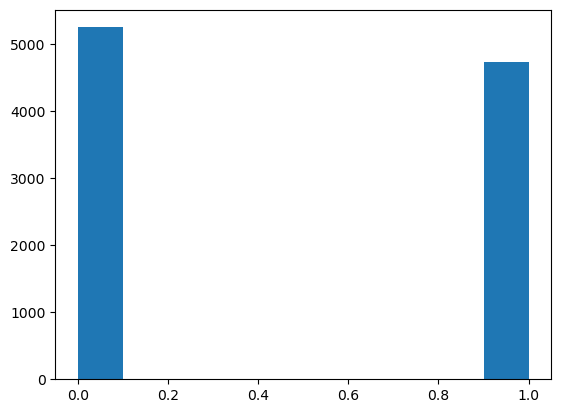

In [104]:
#Histogram for Gender_Male
plt.hist(df['Gender_Male'])
plt.show()

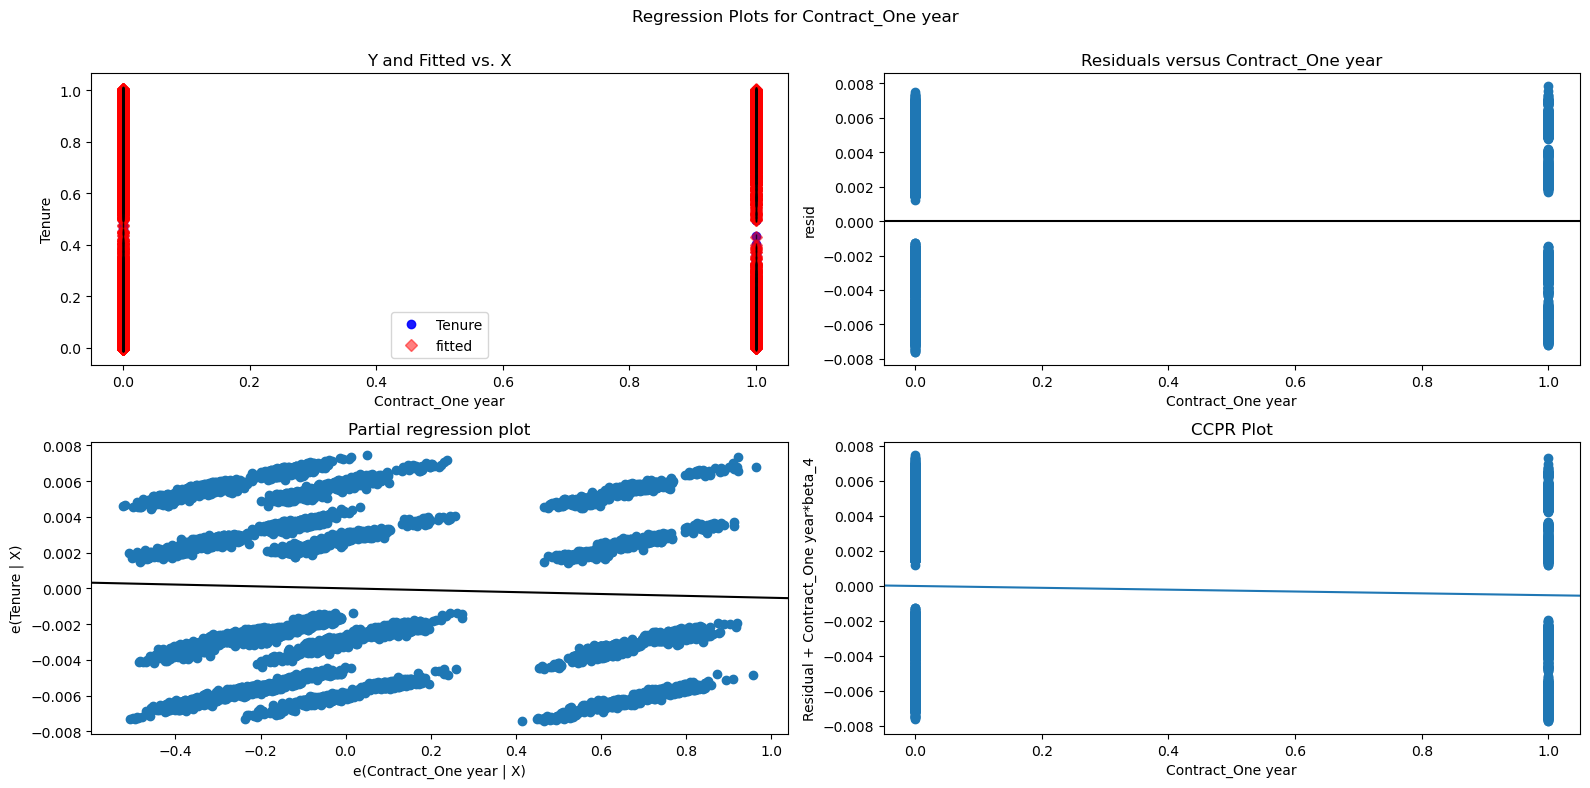

In [105]:
#Residual plot for Contract_One year
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Contract_One year', fig=fig);

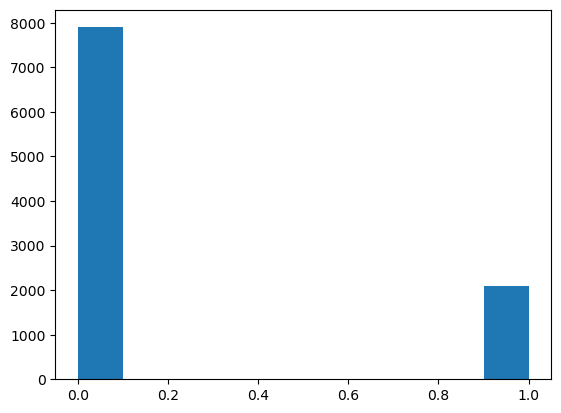

In [106]:
#Histogram for Contract_One year
plt.hist(df['Contract_One year'])
plt.show()

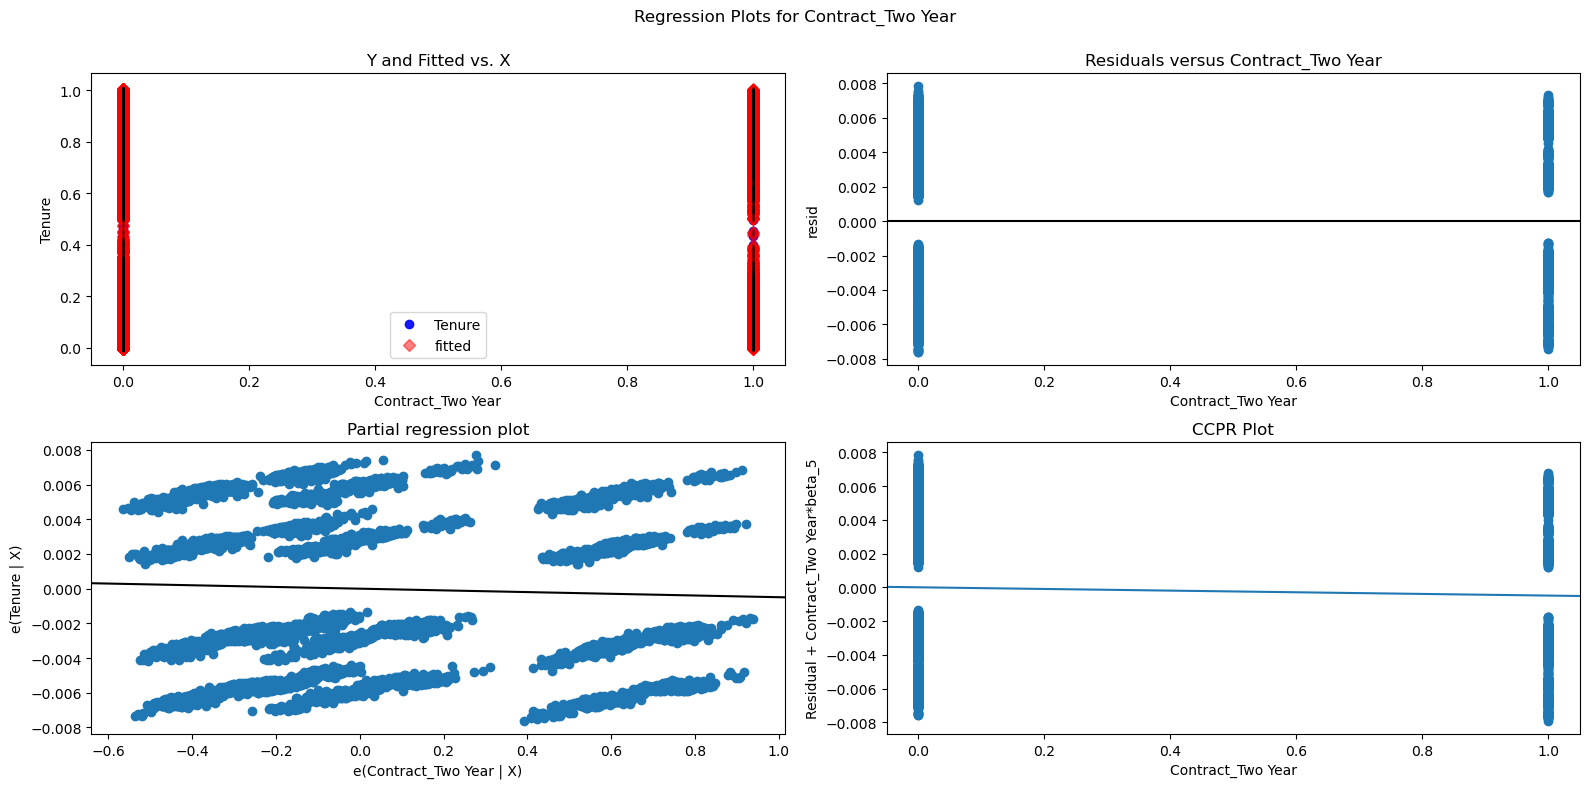

In [107]:
#Residual plot for Contract_Two Year
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Contract_Two Year', fig=fig);

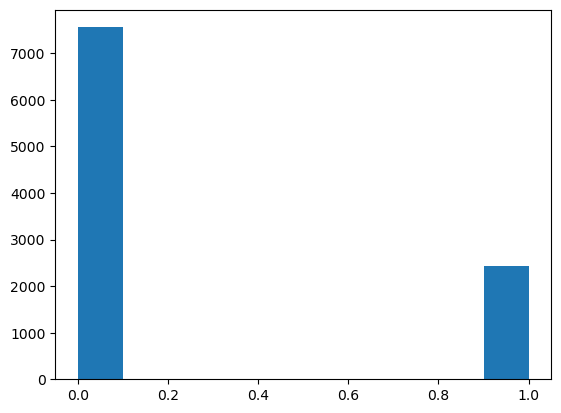

In [108]:
#Histogram for Contract_Two Year
plt.hist(df['Contract_Two Year'])
plt.show()

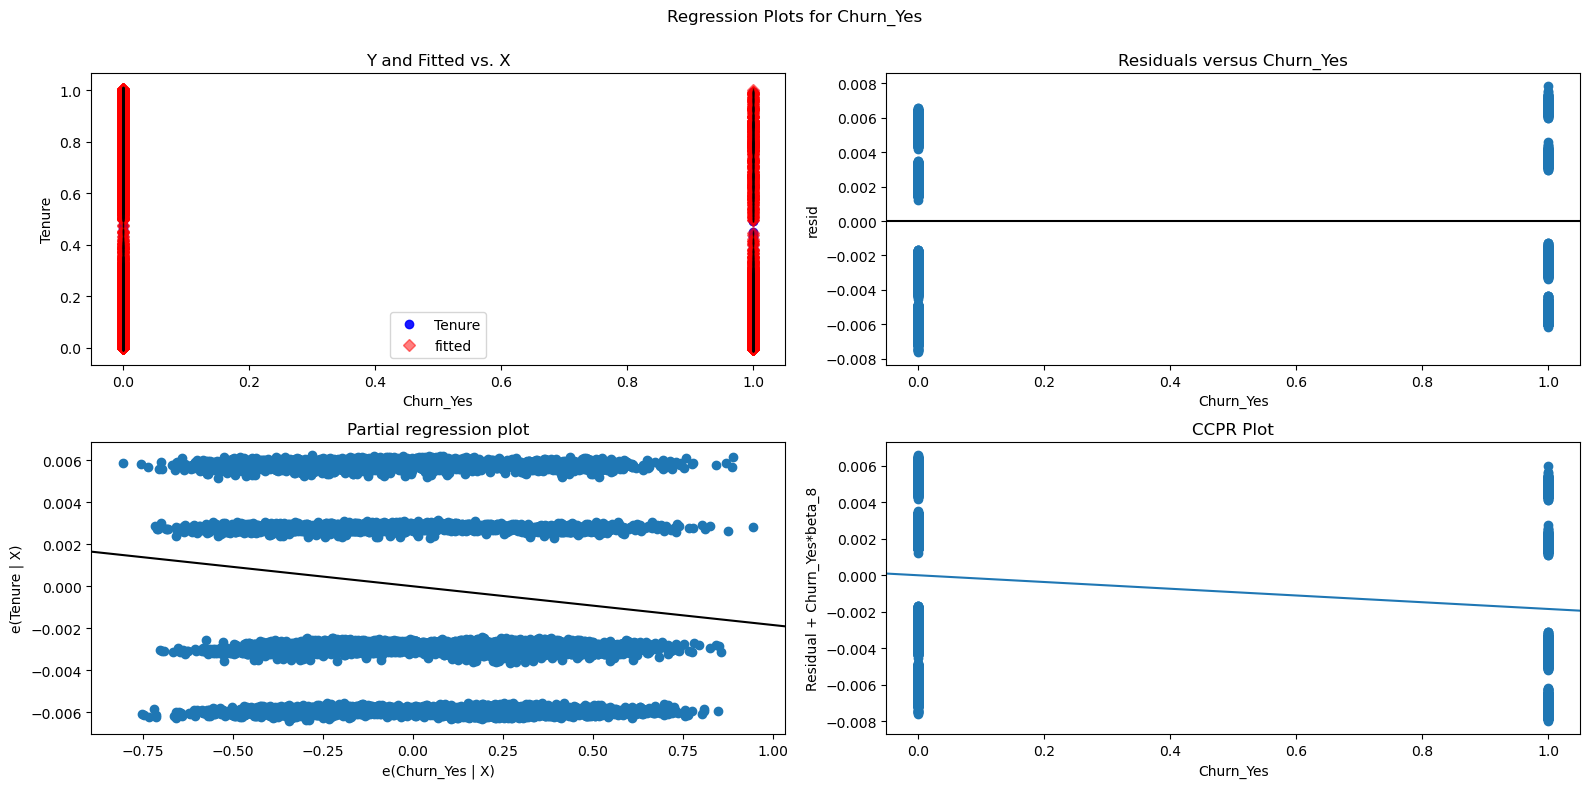

In [109]:
#Residual plot for Churn_Yes
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Churn_Yes', fig=fig);

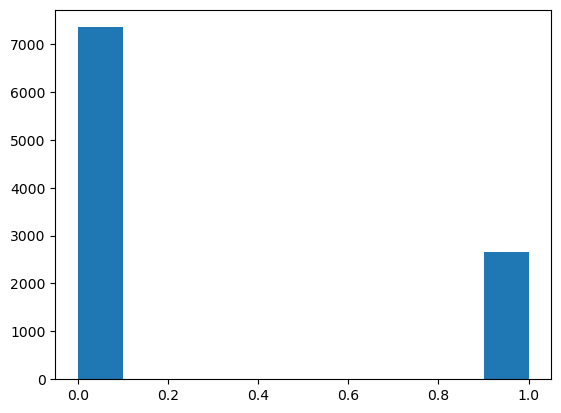

In [110]:
#Histogram for Churn_Yes
plt.hist(df['Churn_Yes'])
plt.show()

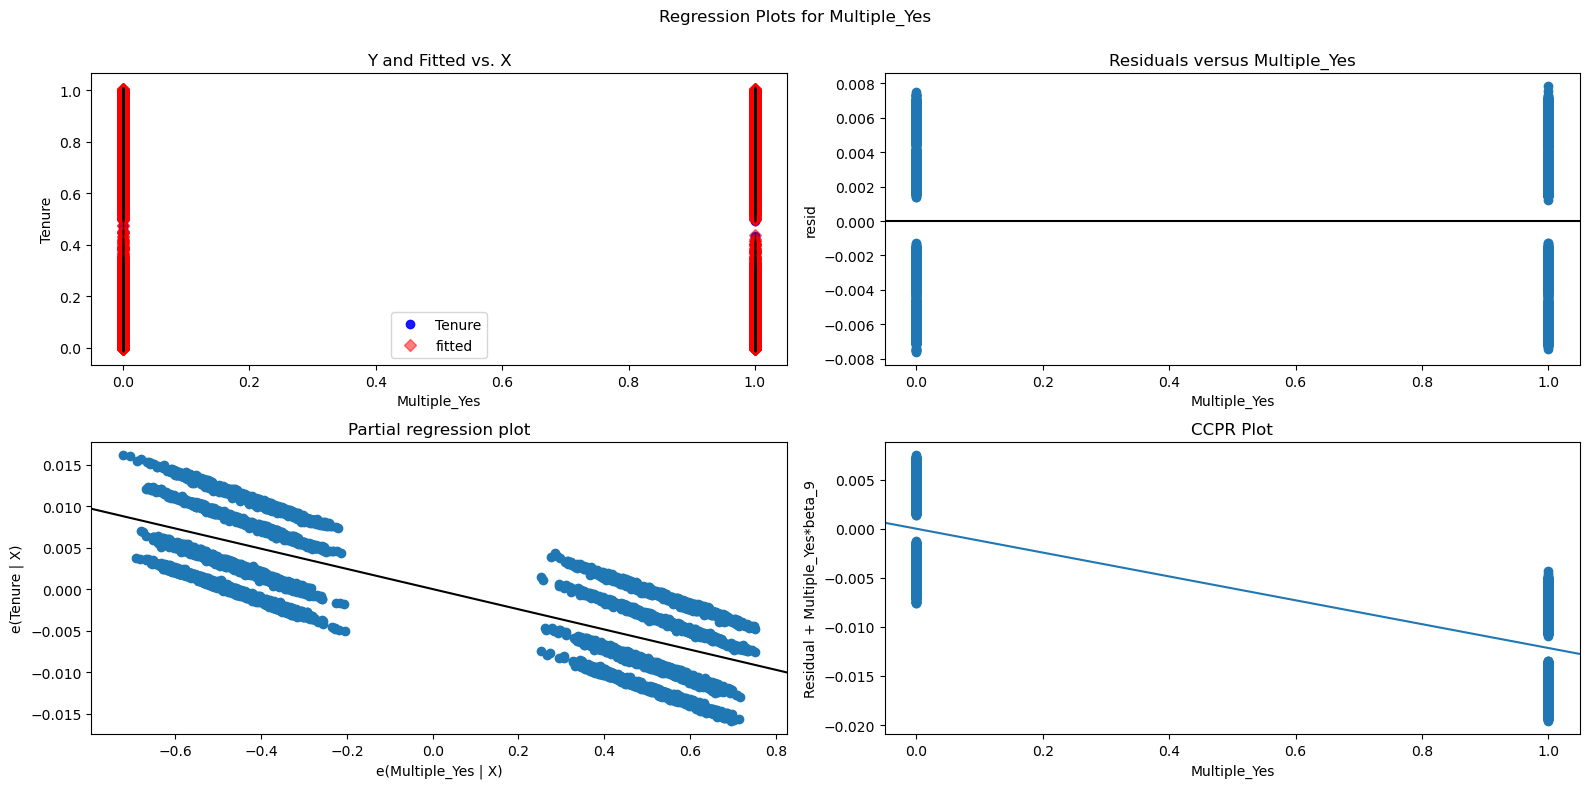

In [111]:
#Residual plot for Multiple_Yes
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Multiple_Yes', fig=fig);

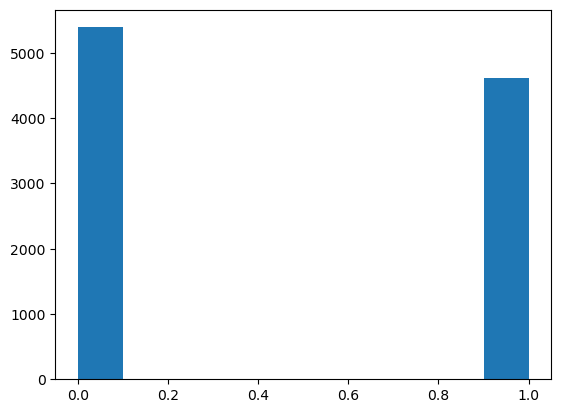

In [112]:
#Histogram for Multiple_Yes
plt.hist(df['Multiple_Yes'])
plt.show()

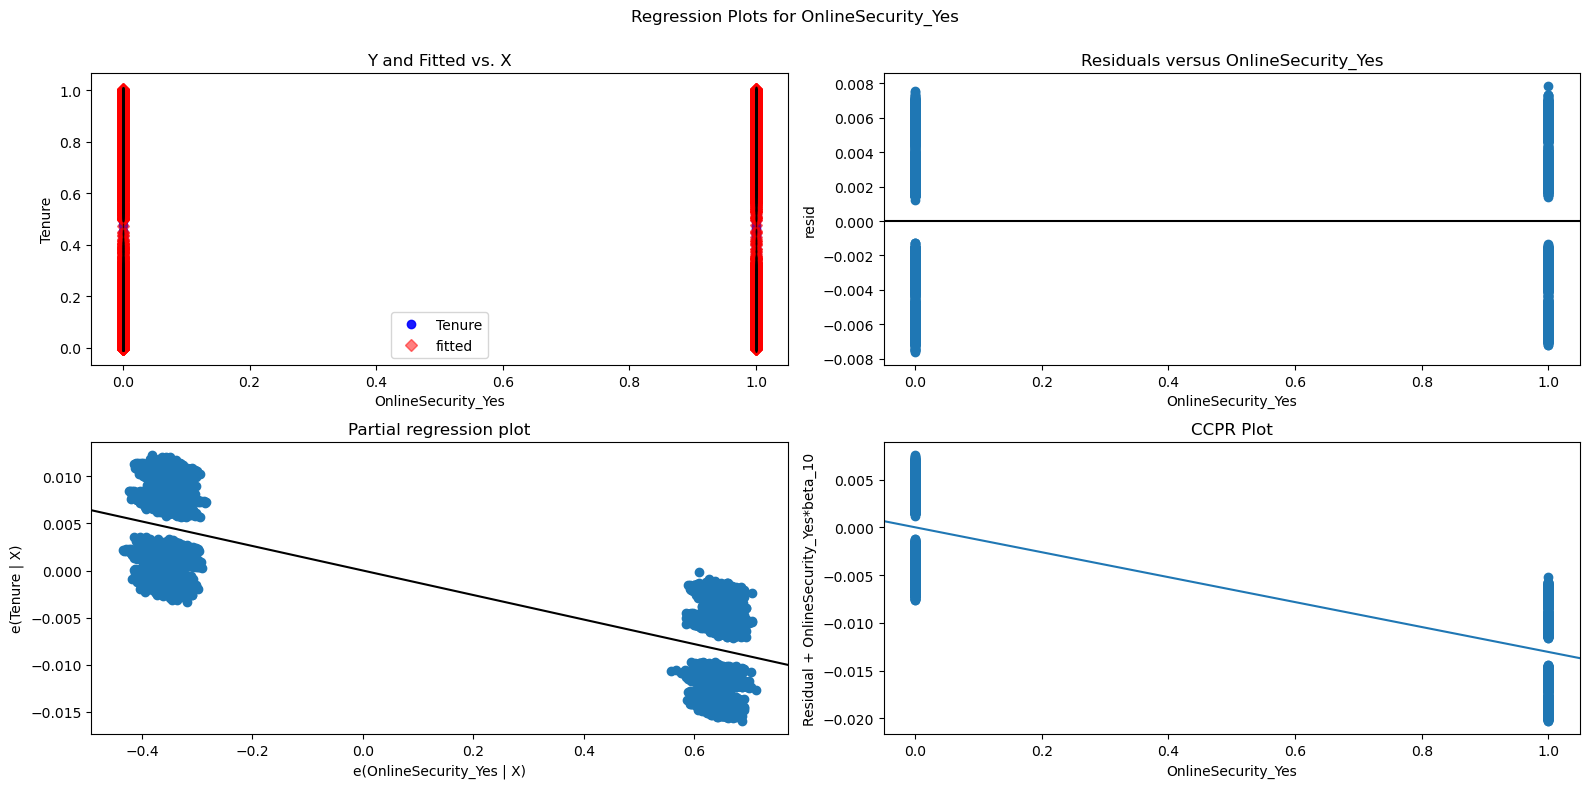

In [113]:
#Residual plot for OnlineSecurity_Yes
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'OnlineSecurity_Yes', fig=fig);

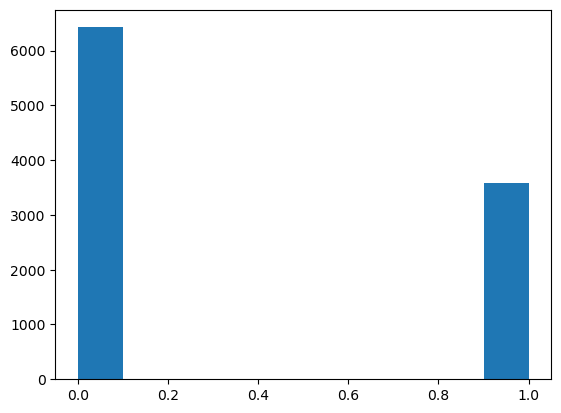

In [114]:
#Histogram for OnlineSecurity_Yes
plt.hist(df['OnlineSecurity_Yes'])
plt.show()

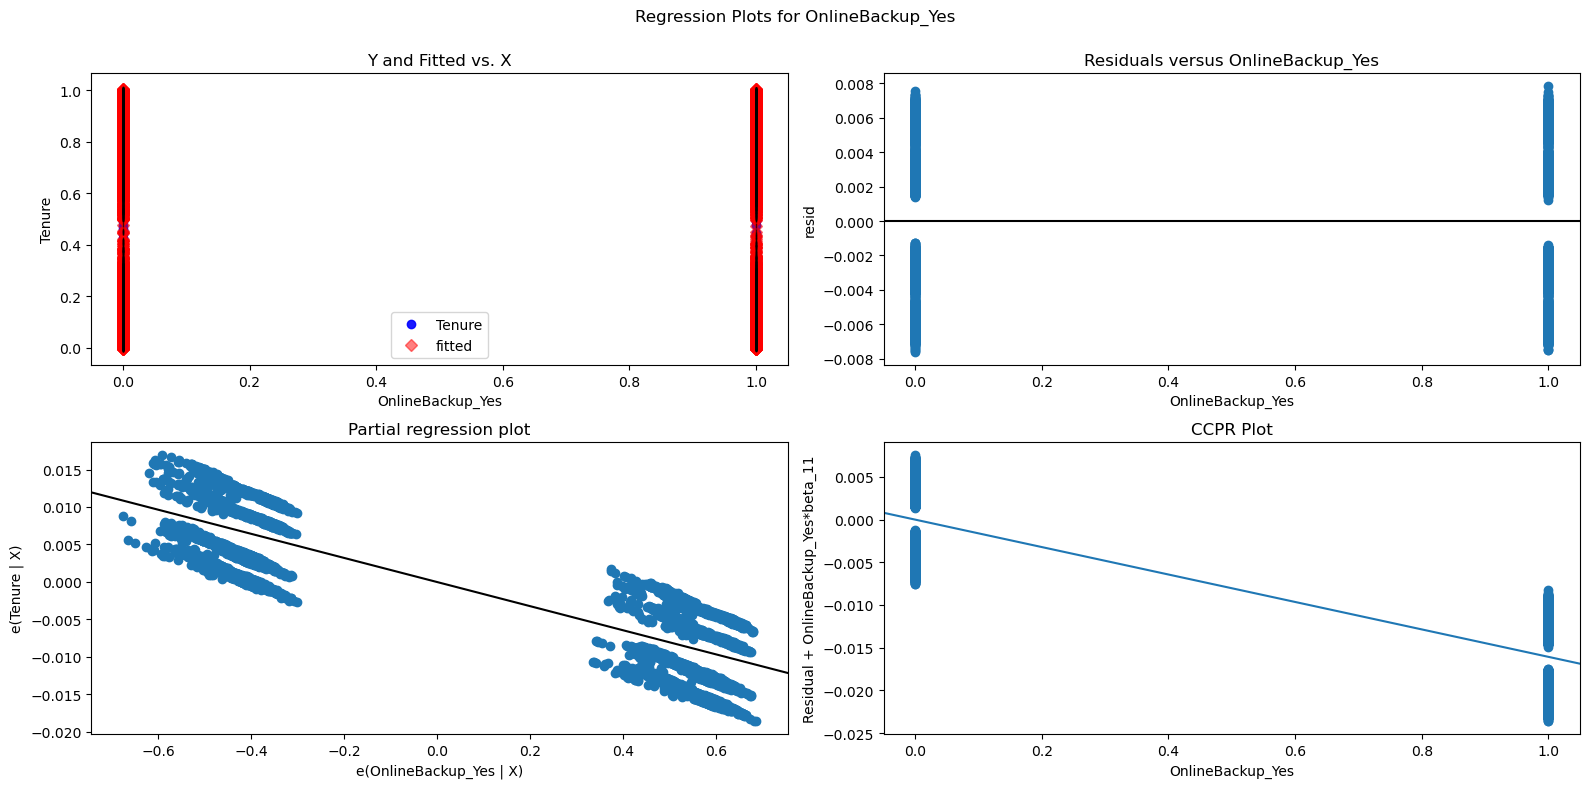

In [115]:
#Residual plot for OnlineBackup_Yes
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'OnlineBackup_Yes', fig=fig);

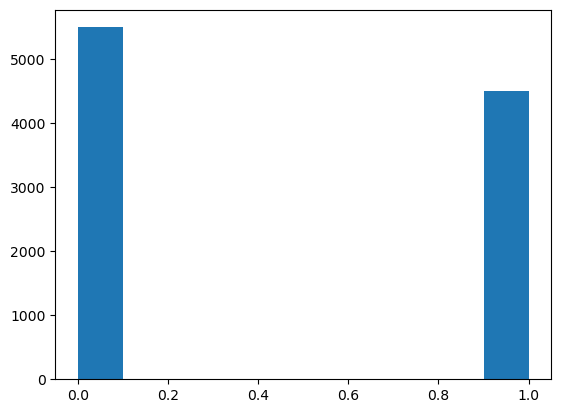

In [116]:
#Histogram for OnlineBackup_Yes
plt.hist(df['OnlineBackup_Yes'])
plt.show()

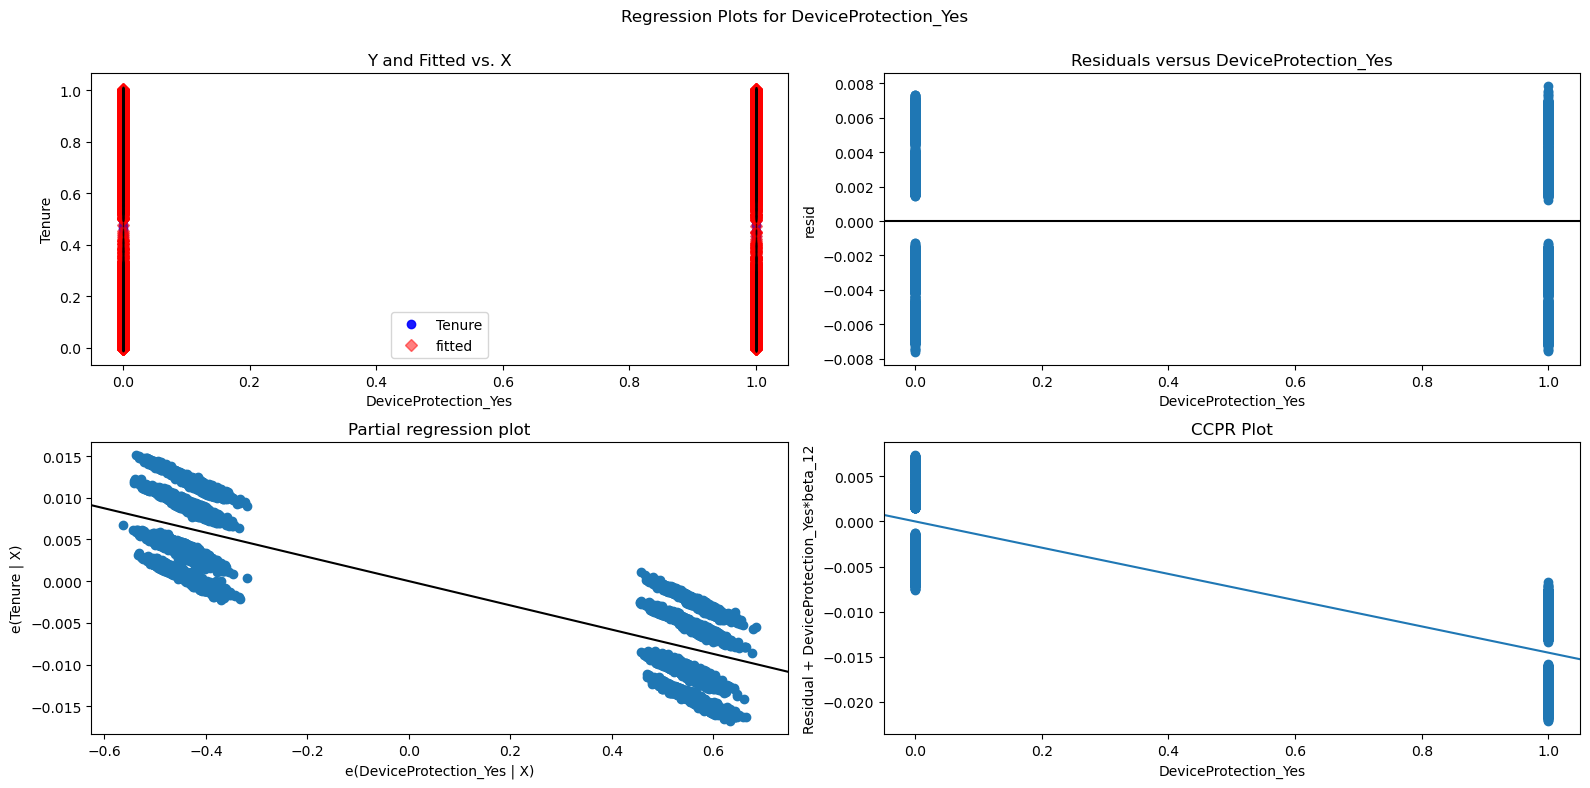

In [117]:
#Residual plot for DeviceProtection_Yes
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'DeviceProtection_Yes', fig=fig);

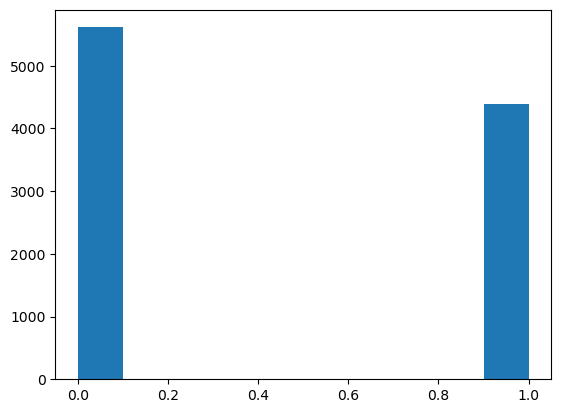

In [118]:
#Histogram for DeviceProtection_Yes
plt.hist(df['DeviceProtection_Yes'])
plt.show()

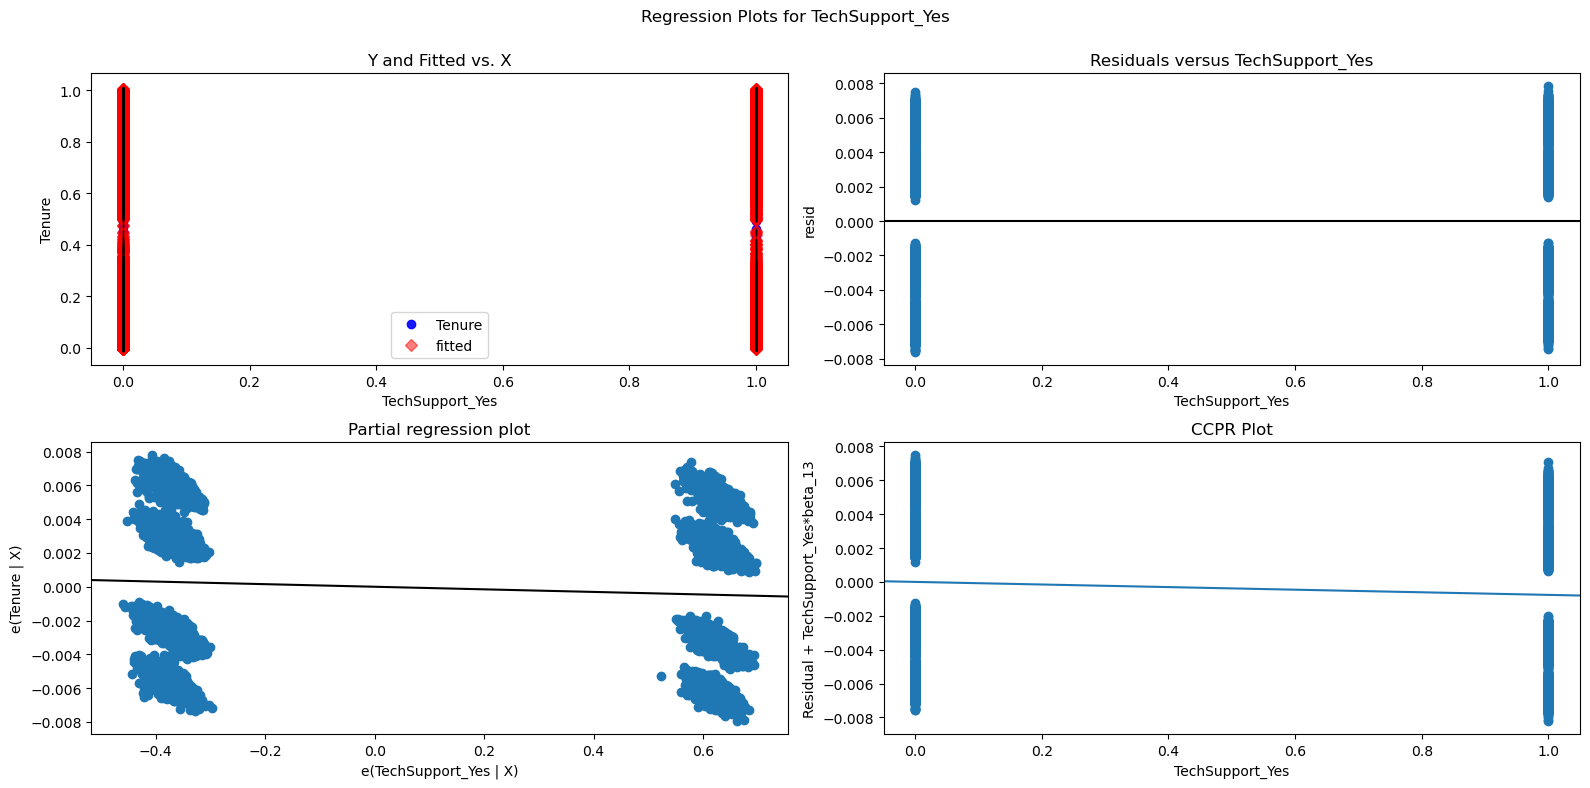

In [119]:
#Residual plot for TechSupport_Yes
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'TechSupport_Yes', fig=fig);

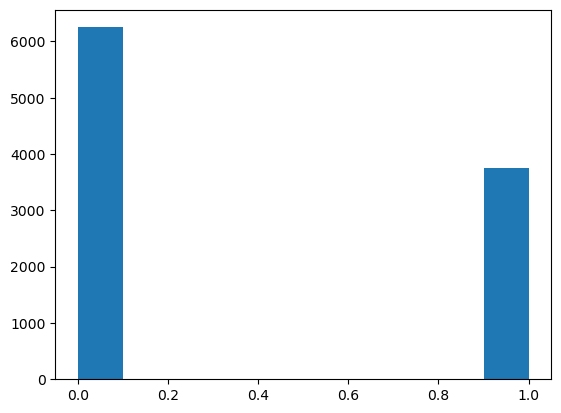

In [120]:
#Histogram for TechSupport_Yes
plt.hist(df['TechSupport_Yes'])
plt.show()

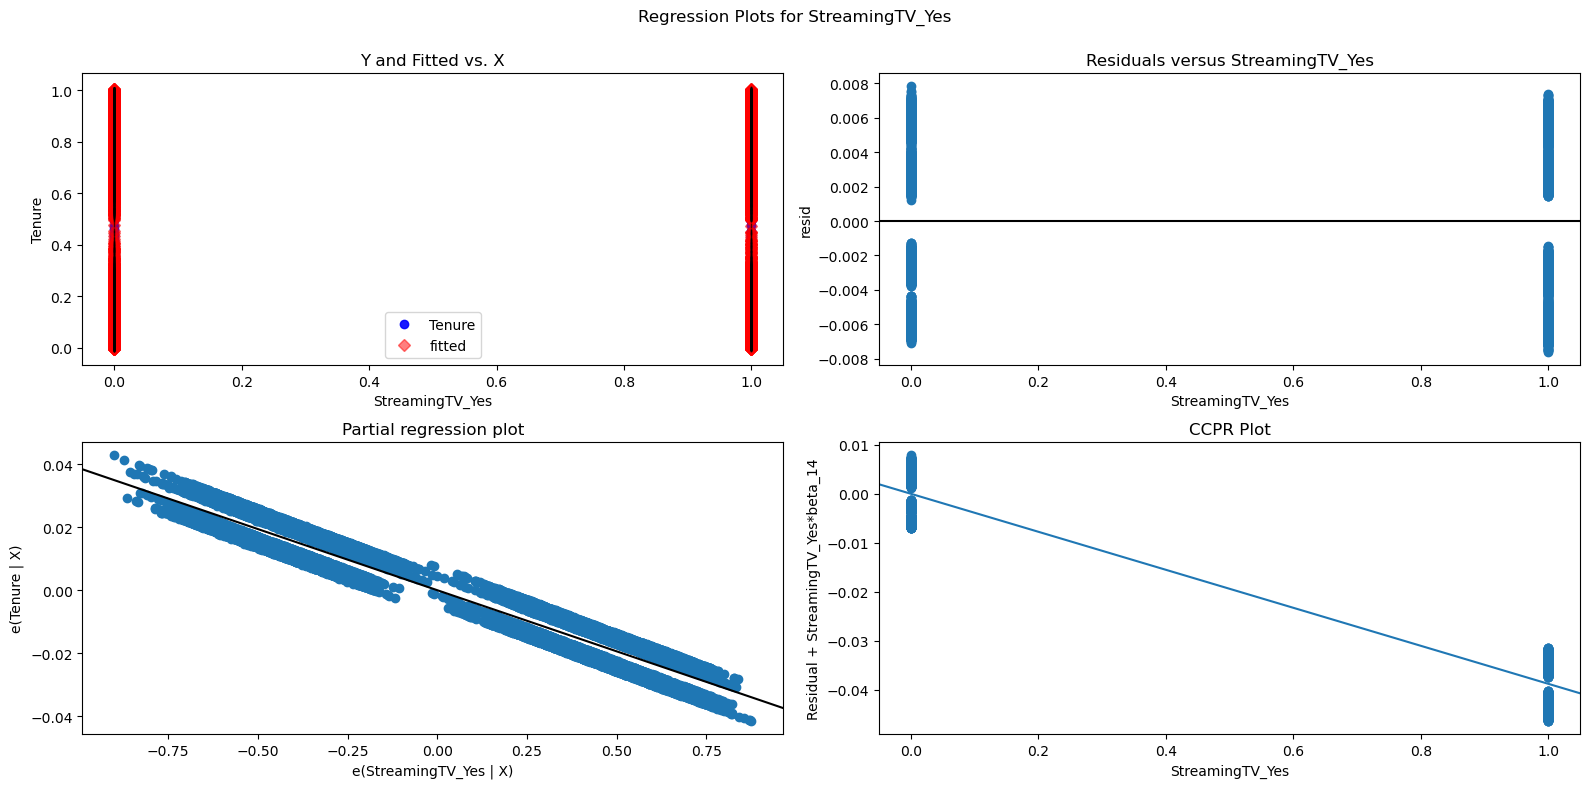

In [121]:
#Residual plot for StreamingTV_Yes
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'StreamingTV_Yes', fig=fig);

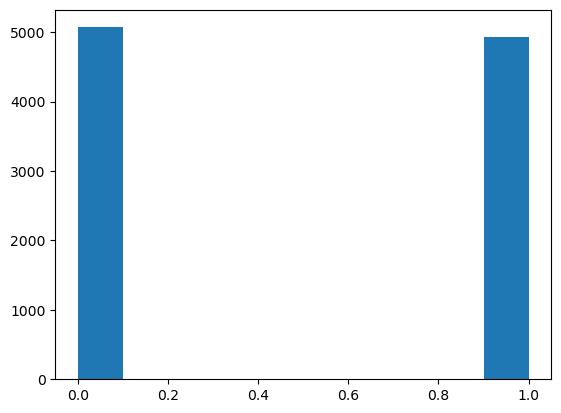

In [122]:
#Histogram for StreamingTV_Yes
plt.hist(df['StreamingTV_Yes'])
plt.show()

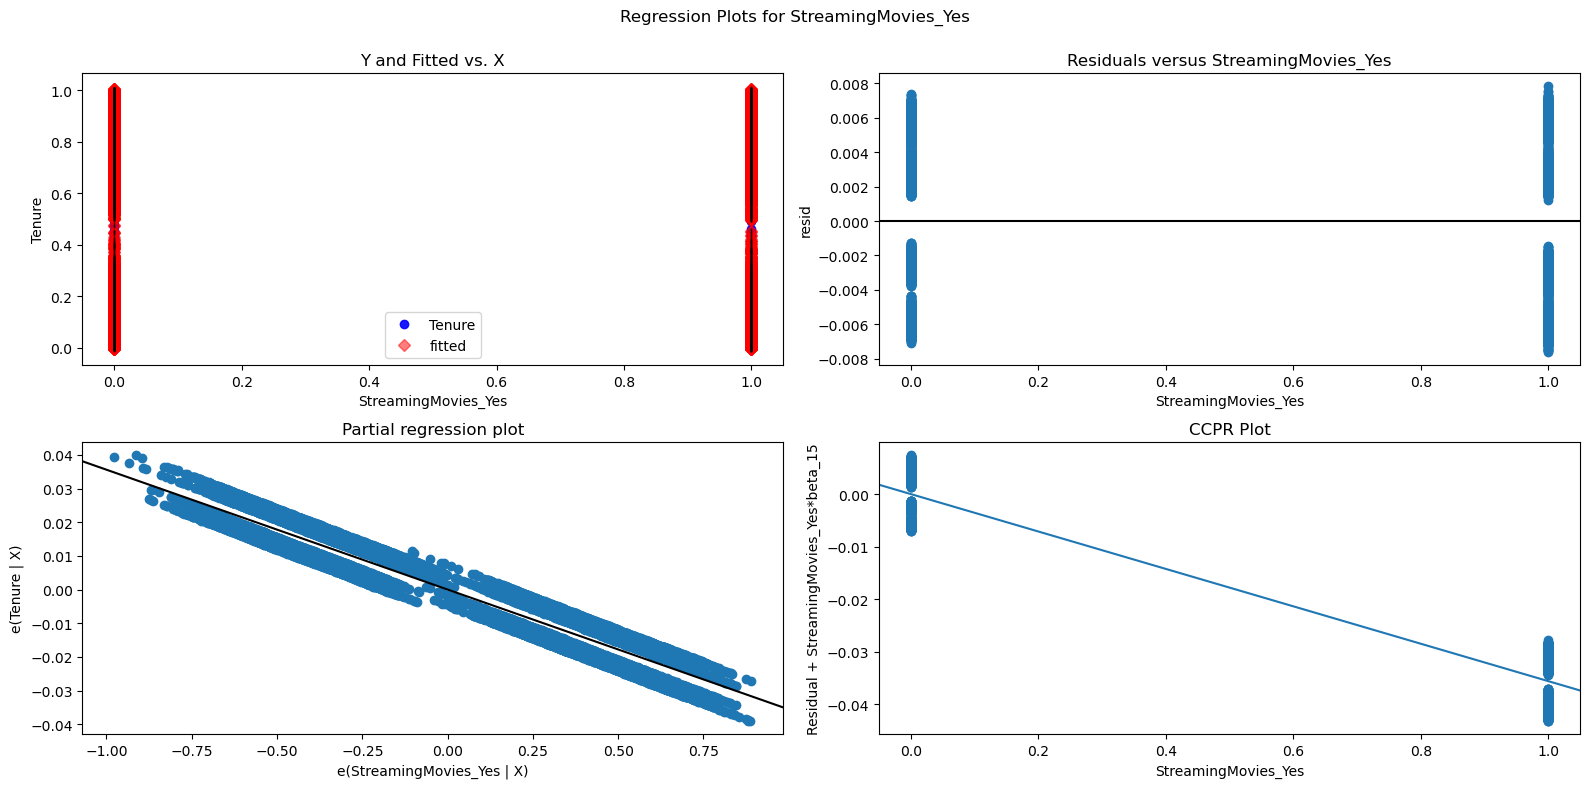

In [123]:
#Residual plot for StreamingMovies_Yes
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'StreamingMovies_Yes', fig=fig);

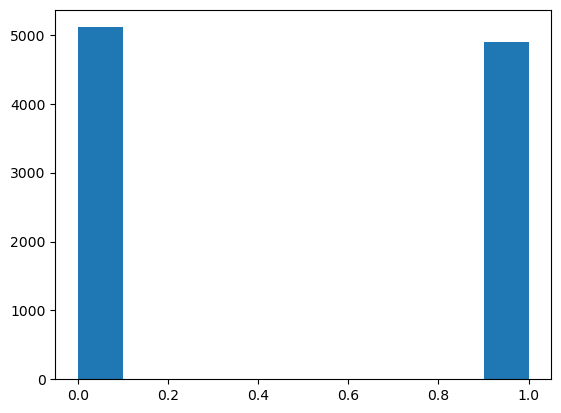

In [124]:
#Histogram for StreamingMovies_Yes
plt.hist(df['StreamingMovies_Yes'])
plt.show()

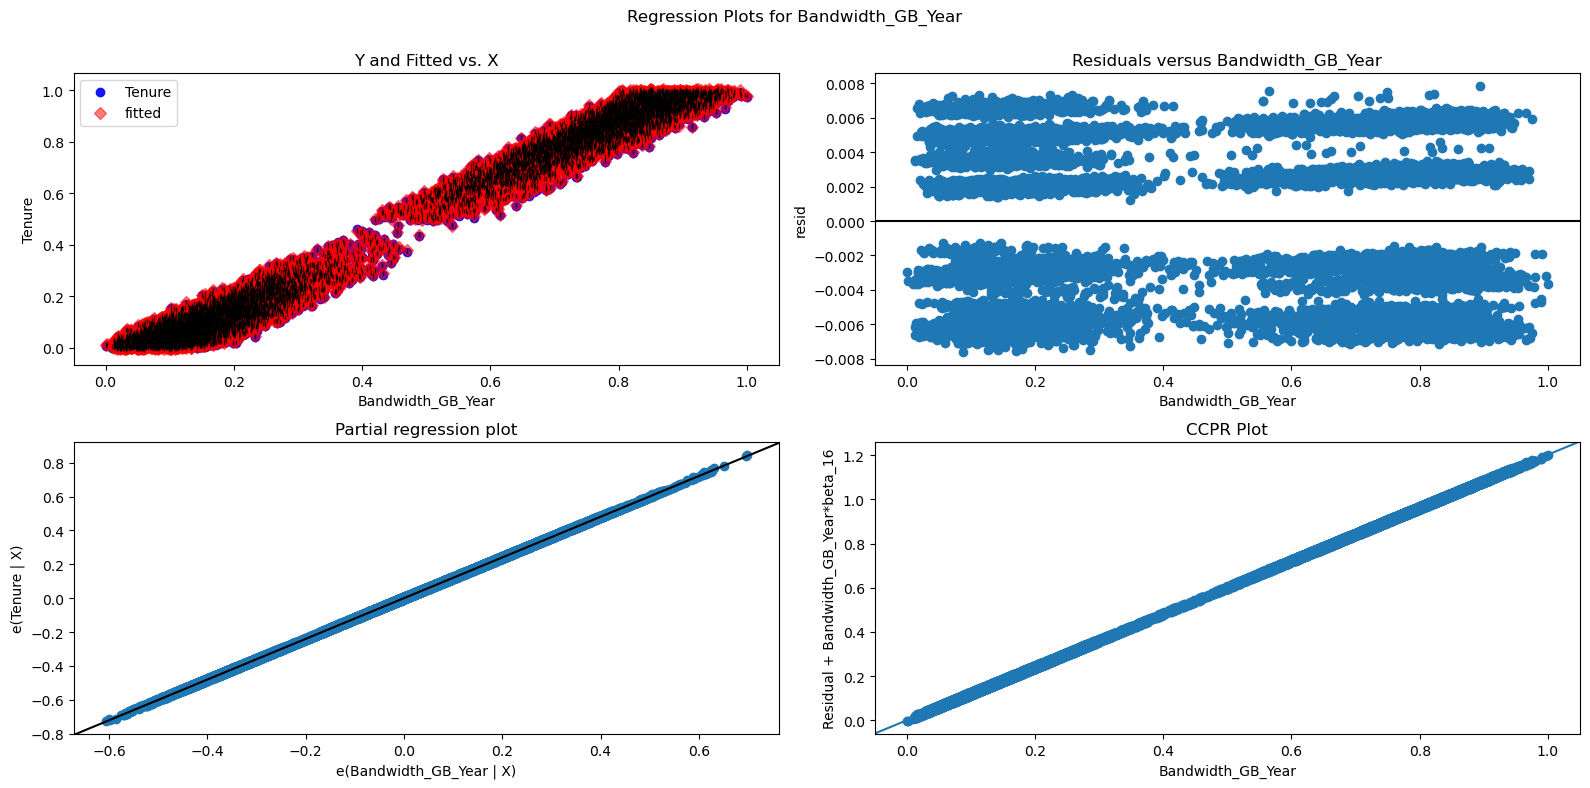

In [125]:
#Residual plot for Bandwidth_GB_Year
fig=plt.figure(figsize = [16,8])
sm.graphics.plot_regress_exog(results, 'Bandwidth_GB_Year', fig=fig);

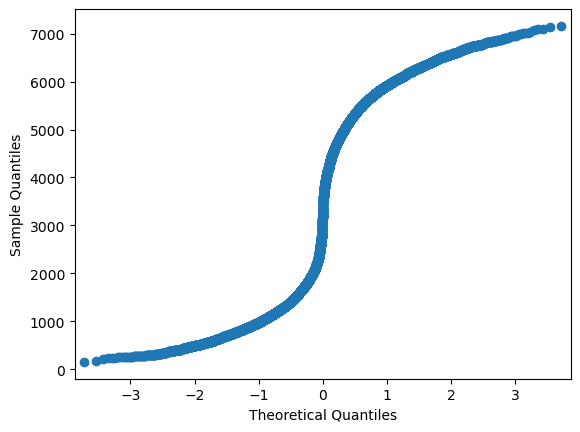

In [126]:
#Q-Q plot for Bandwidth_GB_Year
fig = sm.qqplot(df['Bandwidth_GB_Year'])
plt.show()

In [127]:
y=df_minmax.Tenure
X = df_minmax[['Children', 'Age', 'Gender_Nonbinary','Gender_Male', 
        'Contract_One year', 'Contract_Two Year', 'InternetService_Fiber Optic',
        'InternetService_None', 'Churn_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes',
        'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes',
        'StreamingTV_Yes', 'StreamingMovies_Yes', 'Bandwidth_GB_Year']].assign(const=1)
model=sm.OLS(y,X)
results=model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.891e+06
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        16:07:54   Log-Likelihood:                 39683.
No. Observations:               10000   AIC:                        -7.933e+04
Df Residuals:                    9982   BIC:                        -7.920e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children          

#### Residual standard error of reduced model:

In [128]:
results.resid.std(ddof=X.shape[1])

0.004578561347851453

### E3: Code

### Results

This reduced model is found to be statistically significant using the following metrics. The R-squared has a value of 1 which means that it explains all of the data within the dataset. The Prob(F-statistic) has a value under .05 which means that the regression model is overall statistically significant. Also when looking at the residual standard error, it is very low which means it fits the data very well. The residual standard error measures the distance between the predicted values and the actual values. Because this number is very low, that means our model is accurate. When comparing the residual standard error of the reduced model (0.0045) to the initial model (0.1074) it's apparent that the reduced model is a better fit. The initial model was not statistically significant because it was over 0.05, but the reduced model is. 

In terms of practicality, I don't really think this model has any significance. The majority of the variables have very little impact on the Tenure of the customer. A few variables had a small impact on tenure, but they were more or less variables that are out of control of the company. For example, the variables with the largest impact were whether the customer has streaming TV or streaming movies and the amount of bandwidth they use on average. Some people just don't use a lot of bandwidth. It's possible the customer just watches cable and doesn't often stream movies or tv. 

The multiple regression analysis yields the following equation: 

`y= -0.0721 -0.0529(children) +0.0398(age) +0.0041(gender_nonbinary) -0.0110(gender_male) -0.0005(contract_one year) -0.0005(contract_two year) +0.0710(internetservice_fiber optic) +0.0709(internetservice_none) -0.0018(churn_yes) -0.0122(multiple_yes) -0.0130(onlinesecurity_yes) -0.0161(onlinebackup_yes) -0.0145(deviceprotection_yes) -0.0008(techsupport_yes) -0.0388(streamingtv_yes) -0.0356(streamingmovies_yes) +1.2025(bandwidth_gb_year)`


* Keeping all things constant, one unit increase in Children is associated with a 0.05 unit decrease in Tenure.

* Keeping all things constant, one unit increase in Age is associated with a 0.04 unit increase in Tenure.

* Keeping all things constant, one unit increase in Gender_Nonbinary is associated with a 0.004 unit increase over Gender_Female in relation to Tenure.

* Keeping all things constant, one unit increase in Gender_Male is associated with a 0.011 unit decrease over Gender_Female in relation to Tenure.

* Keeping all things constant, one unit increase in Contract_one year is associated with a 0.0005 unit decrease over Month-to-Month in relation to Tenure.

* Keeping all things constant, one unit increase in Contract_Two Year is associated with a 0.0005 unit decrease over Month-to-Month in relation to Tenure.

* Keeping all things constant, one unit increase in Internetservice_fiber optic is associated with a 0.07 unit increase over DSL in relation to Tenure.

* Keeping all things constant, one unit increase in Internetservice_none is associated with a 0.07 unit increase over DSL in relation to Tenure.

* Keeping all things constant, one unit increase in Churn is associated with a 0.002 unit decrease in Tenure.

* Keeping all things constant, one unit increase in Multiple Phone Lines is associated with a 0.012 unit decrease in Tenure.

* Keeping all things constant, one unit increase in Online Security is associated with a 0.013 unit decrease in Tenure.

* Keeping all things constant, one unit increase in Online Backup is associated with a 0.016 unit decrease in Tenure.

* Keeping all things constant, one unit increase in Device Protection is associated with a 0.015 unit decrease in Tenure.

* Keeping all things constant, one unit increase in Tech Support is associated with a 0.001 unit decrease in Tenure.

* Keeping all things constant, one unit increase in StreamingTV is associated with a 0.039 unit decrease in Tenure.

* Keeping all things constant, one unit increase in Streaming Movies is associated with a 0.036 unit decrease in Tenure.

* Keeping all things constant, one unit increase in Bandwidth_GB_Year is associated with a 1.20 unit increase in Tenure.

Interpreting these results leads to some interesting and sometimes surprising conclusions. For example, customers with children on average, have been with the company for less time than customers without children. Another interesting statistic is that customers who self identified their gender as nonbinary had a longer tenure than females. Customers who self identified as males had the shortest tenures.

Some results that seemed surprising are the contract terms. Customers with month-to-month contracts tended to have longer tenures than customers on either one or two year contracts. More information would be needed here to find out why. Oftentimes month-to-month terms are the highest in price, so these results seem backwards. If the customers that are staying the longest are the ones paying the highest unit price, why offer the contracts? 

For the internet service provider data, it looks like DSL customers had the lowest tenure while customers with either fiber optic internet service or no internet at all both had longer tenures. It seems to suggest that people who choose not to have internet at home tend to stay longer with the service than those who do, up to a point. The customers that have fiber optic internet which is faster and more expensive than DSL tend to have shorter tenure than DSL customers. This could be due to price, or the fact that they have faster internet and are able to stream movies or TV through other sources.

Customers who have recently churned tend to have lower tenures. This one is a no-brainer.

Customers with multiple phone lines tend to have lower tenures. More information would definitely need to be acquired here in order to make any actionable decisions. Why do these customers have multiple phone lines? Are these businesses? 

The next few results seem to have something to do with people's technical prowess. People with online security services, online backup services, tech support services, and device protection services all tend to have lower tenures. These people all seem a little more technological in nature, and may be finding these services elsewhere, possibly through streaming services. That seems especially probable considering the fact that customers with streaming tv or movies tend to have much lower tenures than customers without. This could be due to the fact that there are so many streaming services available, and only a finite amount of time in which to watch them. 

Finally, customers using more gigabytes in bandwidth per year are more likely to have large tenures. This makes sense as customers using large amounts of data have a great need for telecommunications services. 


### F2: Recommendations

Because the model doesn't seem practically significant, I don't have a lot of recommendations. A lot of the variables associated with a decrease in Tenure are dependent on the technical prowess of the customer. It would be possible to try to entice them to stay longer with deeper discounts, but more information would be needed to test this out. Although the impact is small, I would recommend eliminating the contracts and charging all customers month-to-month. This is based on my experiences with other companies that month-to-month service is usually the highest rate. Because the contract terms had a decrease in tenure with customers, it would make sense to eliminate them altogether and charge all customers the same higher month-to-month rate. 

### G: Panopto Recording

A recording of me explaining my models was submitted alongside this notebook. 

### H: Code References

[Dr. Sewell's Seminar](https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ER_vJMbYtxJGpxImpZ0DUQcBoVcORYKanFVKNKFcEXkRow?rtime=BZGHRaSj3Eg) was used to check for multicollinearity with the Variance Inflation Factor.

[GeeksForGeeks: Generating  Residual Plots in Python](https://www.geeksforgeeks.org/how-to-create-a-residual-plot-in-python/) was used for help coding my residual plots. 

### I: Source References

[Statsquest](https://www.youtube.com/watch?v=nk2CQITm_eo) was used to help understand multiple linear regression.

[Dr. Middleton's Seminar](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970) was used to help understand one-hot encoding.

[Unifying Data Science](https://www.unifyingdatascience.org/html/interpreting_indicator_vars.html) was used to understand how to interpret dummy variables.

[Statology: How to Interpret Regression Coefficients](https://www.statology.org/how-to-interpret-regression-coefficients/) was used as well to help interpret categorical predictor variables.


